# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")
from google.colab import drive

## Loading the dataset

In [ ]:
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
cred=pd.read_csv('/gdrive/MyDrive/Colab Notebooks/Project 3/BankChurners.csv')

In [ ]:
data=cred.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [ ]:
print("The dataset contains {} rows and {} columns".format(data.shape[0],data.shape[1]))

The dataset contains 10127 rows and 21 columns


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
data.isnull().sum()[data.isnull().sum()>0]

,0
Education_Level,1519
Marital_Status,749


* we have 6 columns that have 'object' type, and there are missing values in Education level and Marital status

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,NaN,NaN,NaN,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127.000,NaN,NaN,NaN,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127.000,NaN,NaN,NaN,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Education_Level,8608,6,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,9378,3,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127.000,NaN,NaN,NaN,35.928,7.986,13.000,31.000,36.000,40.000,56.000


In [ ]:
cat_cols=['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

In [ ]:
for col in cat_cols:
  print(data[col].value_counts())
  print(data[col].value_counts(normalize=True))
  print('-'*50)

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Attrition_Flag
Existing Customer   0.839
Attrited Customer   0.161
Name: proportion, dtype: float64
--------------------------------------------------
Gender
F    5358
M    4769
Name: count, dtype: int64
Gender
F   0.529
M   0.471
Name: proportion, dtype: float64
--------------------------------------------------
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
Education_Level
Graduate        0.363
High School     0.234
Uneducated      0.173
College         0.118
Post-Graduate   0.060
Doctorate       0.052
Name: proportion, dtype: float64
--------------------------------------------------
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
Marital_Status
Married    0.500
Single     0.420
Divorced   0.080
Name: proportion, dtype: flo

* there is a strange 'abc' value in Income_Category column, which is obviously false, we will need to deal with it

In [ ]:
data[data['Income_Category']=='abc'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLIENTNUM,1112.000,NaN,NaN,NaN,737579712.429,36584733.557,708086958.000,712908820.500,717319158.000,771893601.750,827964858.000
Attrition_Flag,1112,2,Existing Customer,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,1112.000,NaN,NaN,NaN,46.274,8.663,26.000,41.000,46.000,52.000,68.000
Gender,1112,2,F,1060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,1112.000,NaN,NaN,NaN,2.275,1.327,0.000,1.000,2.000,3.000,5.000
Education_Level,967,6,Graduate,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,1030,3,Married,493,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,1112,1,abc,1112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,1112,4,Blue,1045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,1112.000,NaN,NaN,NaN,35.754,8.479,13.000,31.000,36.000,40.000,56.000


* we can see that the majority of records with 'abc' income category belong to females and also have 'blue' card category. Let's group by these columns

In [ ]:
data.groupby('Gender')['Income_Category'].value_counts()

Gender  Income_Category
F       Less than $40K     3284
        abc                1060
        $40K - $60K        1014
M       $80K - $120K       1535
        $60K - $80K        1402
        $40K - $60K         776
        $120K +             727
        Less than $40K      277
        abc                  52
Name: count, dtype: int64

In [ ]:
df_m_abc=data[(data["Income_Category"]=='abc') & (data['Gender']=='M')]

In [ ]:
df_m_abc['Card_Category'].value_counts()

,count
Card_Category,
Blue,50
Silver,2


In [ ]:
data.groupby('Card_Category')['Income_Category'].value_counts()

Card_Category  Income_Category
Blue           Less than $40K     3403
               $40K - $60K        1675
               $80K - $120K       1395
               $60K - $80K        1273
               abc                1045
               $120K +             645
Gold           $60K - $80K          29
               Less than $40K       24
               $80K - $120K         21
               $120K +              18
               $40K - $60K          15
               abc                   9
Platinum       abc                   5
               $60K - $80K           4
               Less than $40K        4
               $120K +               4
               $80K - $120K          2
               $40K - $60K           1
Silver         Less than $40K      130
               $80K - $120K        117
               $40K - $60K          99
               $60K - $80K          96
               $120K +              60
               abc                  53
Name: count, dtype: int64

* most popular Income Category for females is 'Less than \$40K'
* Males tend to have higher income, but almost all male records with 'abc' values also have 'blue' card category, and for 'blue' card holders the most common income category is also 'Less that \$40K'.
* based on this I make the decision to replace 'abc' with 'Less that \$40K' Income category

In [ ]:
data.loc[data['Income_Category']=='abc','Income_Category']='Less than $40K'

In [ ]:
data.duplicated().sum()

0

* there are no duplicate records

In [ ]:
data['CLIENTNUM'].nunique()

10127

In [ ]:
#droping 'CLIENTNUM' column because it contains unique client IDs and will not bring us any value.
data.drop(columns='CLIENTNUM',axis=1,inplace=True)

In [ ]:
#encoding 'Attrition Flag' with numeric values
data.replace({"Attrition_Flag": {"Existing Customer":0,"Attrited Customer":1}}, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        #order=data[feature].value_counts().index[:n].sort_values(),
        order=data[feature].value_counts().index[:n]
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart with percentages displayed on the columns.

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    # Crosstab for count
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)

    # Crosstab for normalized (percentage)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    # Plot stacked bar chart
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))

    # Add percentages on the columns
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.0%}', (x + width / 2, y + height / 2), ha='center', va='center')

    plt.xticks(rotation=0)

    plt.legend(
        loc="upper left", bbox_to_anchor=(1, 1),
    )
    plt.show()

In [ ]:
# function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target, hist_stat="density", hist_xticks=None, boxplot_yticks=None):
    """
    hist_xticks: set a number if more granular xticks for histograms are needed
    boxplot_yticks: set a number if more granular yticks for boxplots are needed
    hist_stat: stat for histogram - 'density' or 'frequency'
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of " + target+" for target "+ str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat=hist_stat,
    )
    if hist_xticks != None:
      axs[0,0].set_xticks(np.arange(data[predictor].min(), data[predictor].max() + 1, hist_xticks))  # Increase the number of x-ticks

    axs[0, 1].set_title("Distribution of "+target+" for target " + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat=hist_stat,
    )
    if hist_xticks != None:
        axs[0,1].set_xticks(np.arange(data[predictor].min(), data[predictor].max() + 1, hist_xticks))  # Increase the number of x-ticks

    axs[1, 0].set_title("Boxplot w.r.t " + target)
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], hue=target, legend=False)
    if boxplot_yticks != None:
      axs[1,0].set_yticks(np.arange(data[predictor].min(), data[predictor].max() + 1, boxplot_yticks))   # Increase the number of y-ticks

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t "+target)
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 1], showfliers=False, hue=target, legend=False)
    if boxplot_yticks != None:
      axs[1,1].set_yticks(np.arange(data[predictor].min(), data[predictor].max() + 1, boxplot_yticks))   # Increase the number of y-ticks

    plt.tight_layout()
    plt.show()

###Univariate Analysis


In [ ]:
hist_cols=['Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

In [ ]:
bar_cols=['Attrition_Flag','Gender','Education_Level','Dependent_count','Marital_Status','Income_Category','Card_Category','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']

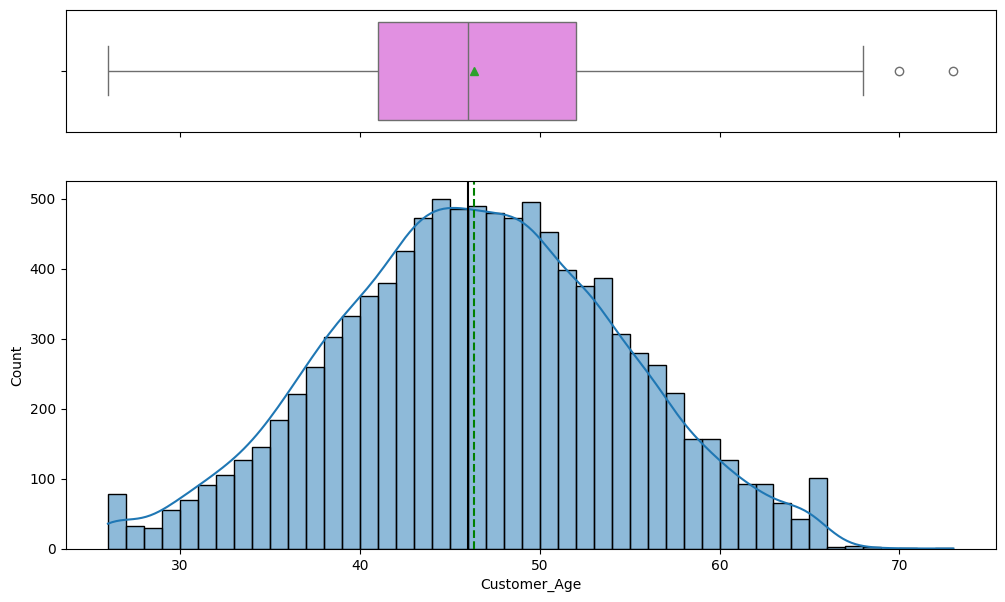

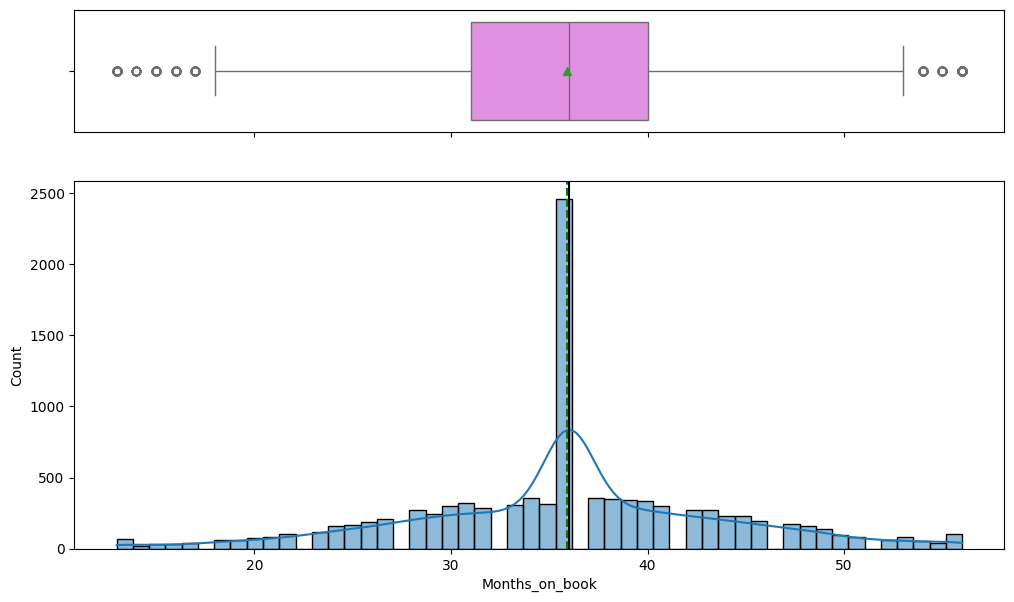

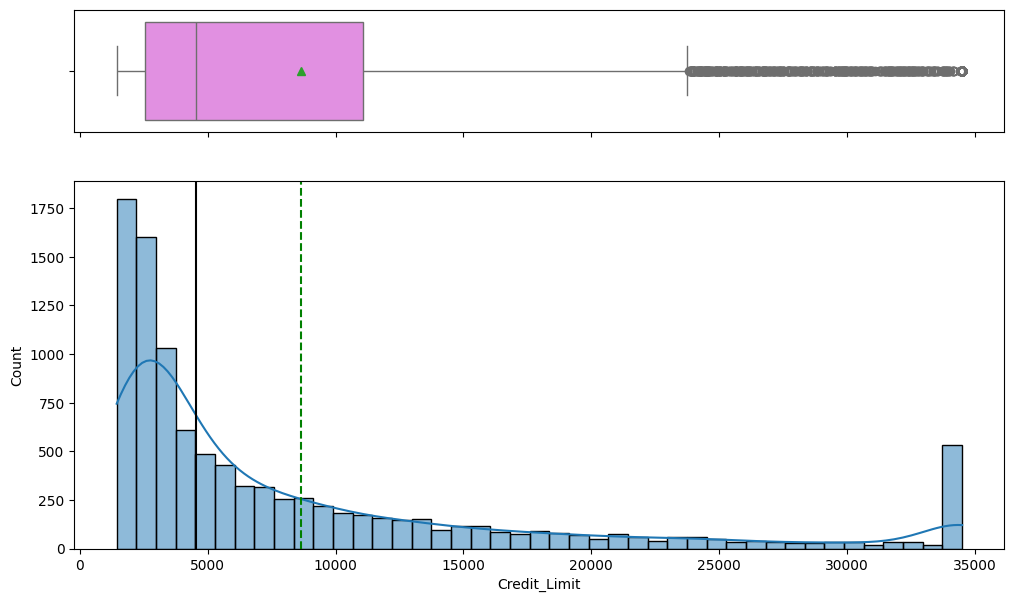

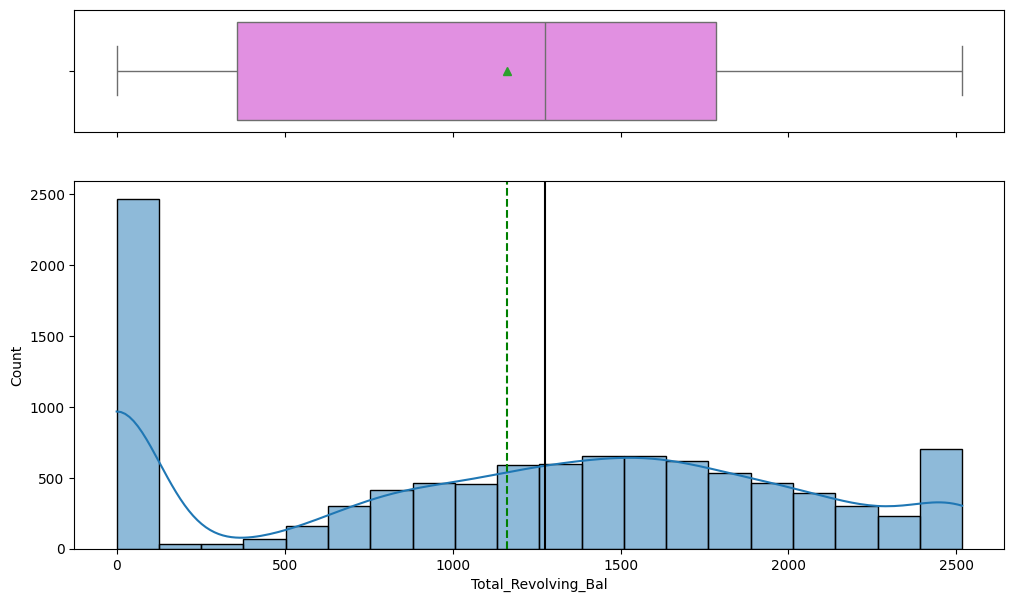

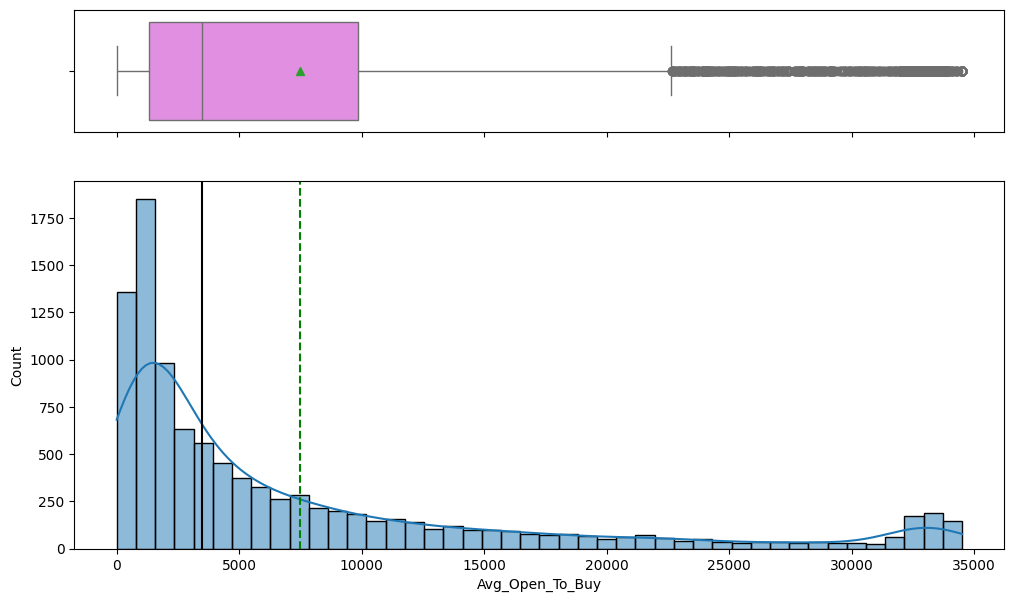

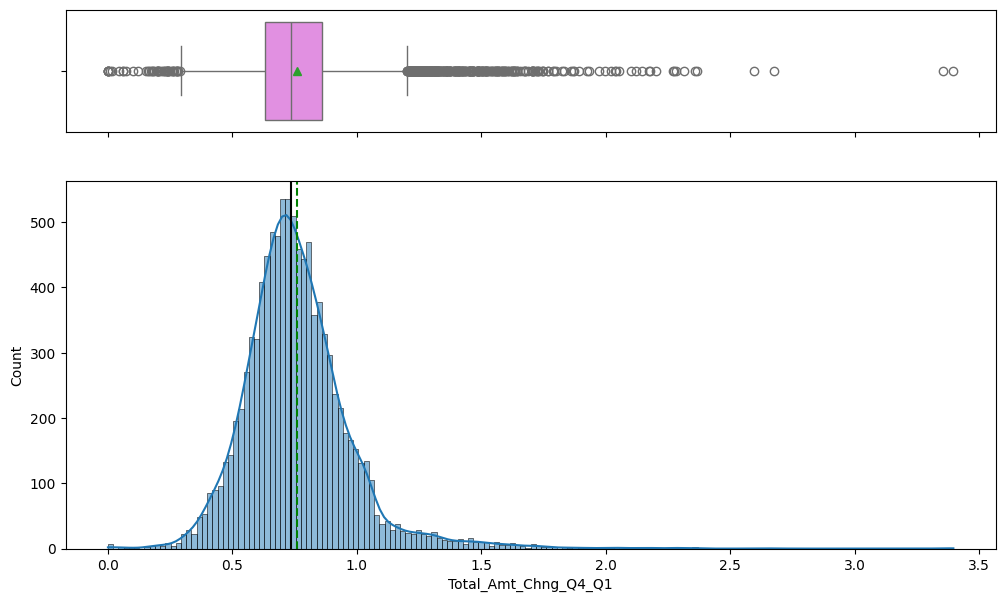

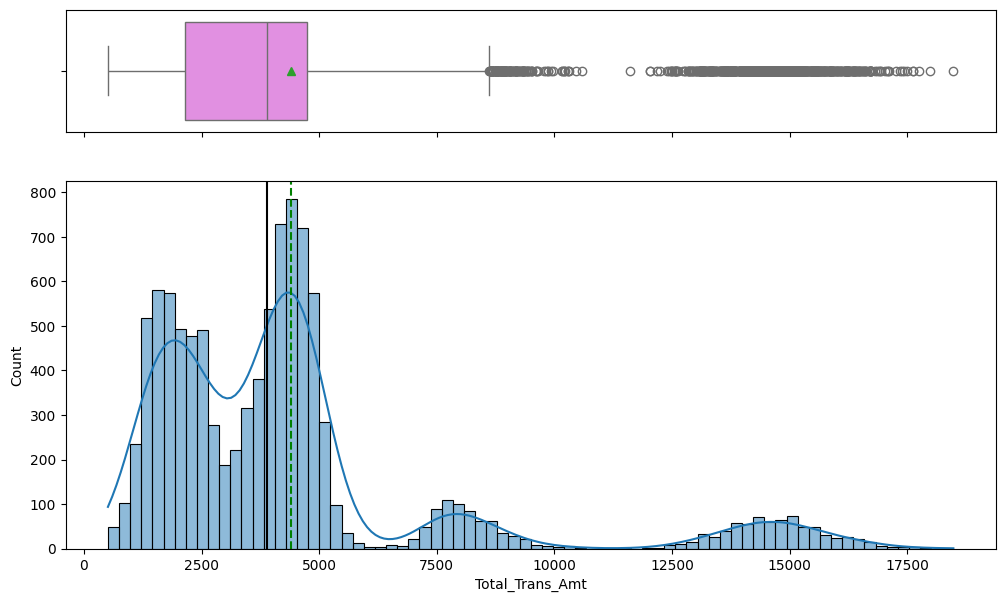

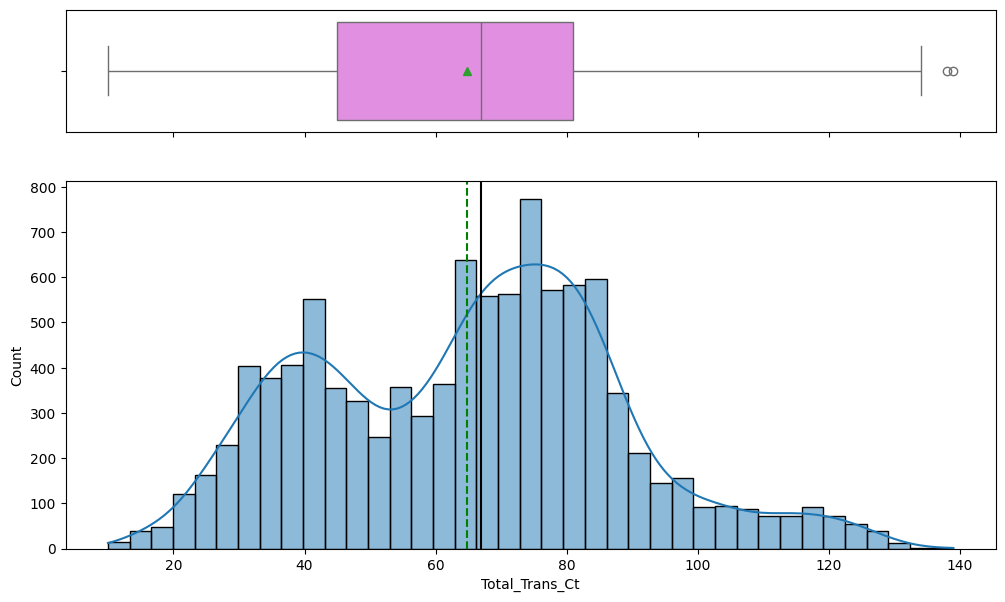

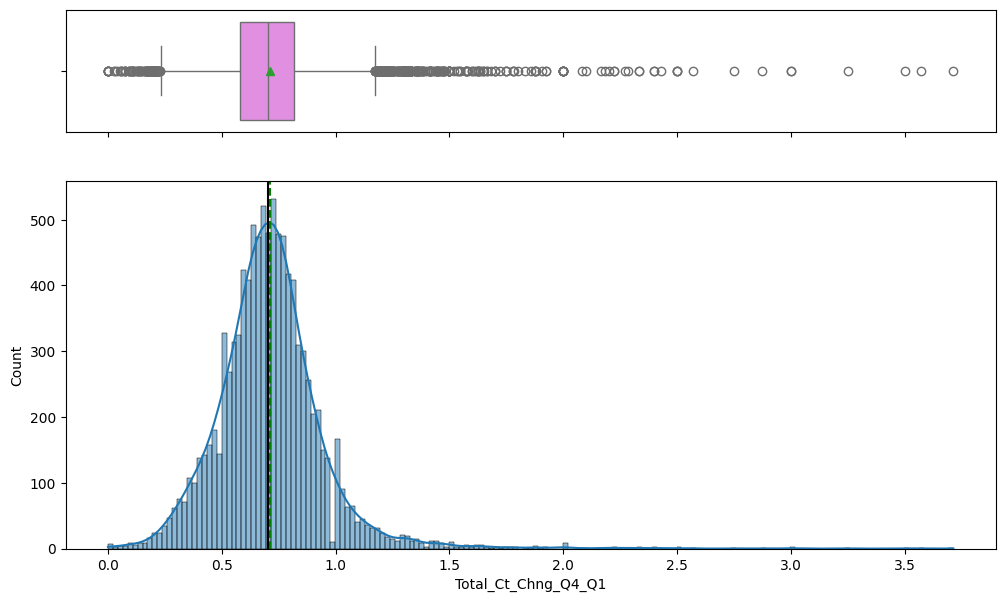

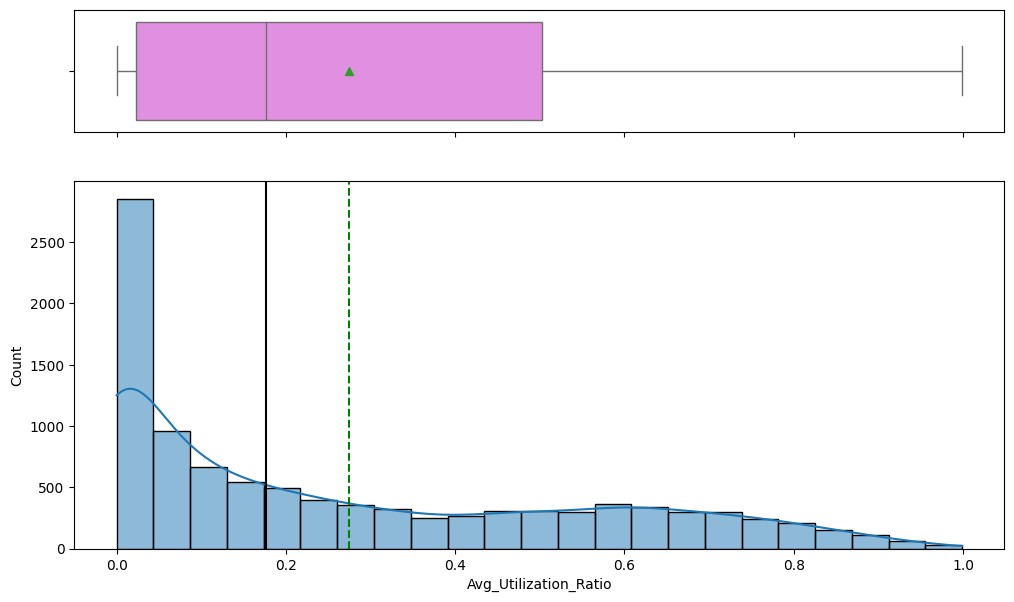

In [ ]:
for col in hist_cols:
  histogram_boxplot(data, col, kde=True)

* Customer age is normally distributed
* 'Months on book' is normally distributed with a spike in the middle
* Credit limit is right-skewed
* Total revolving balance is slightly left-skewed
* Open to buy credit line  is right-skewed
* Change in Transaction Amount (Q4 over Q1) has an almost normal distribution with a lot of outliers on both sides
* Total Transaction Amount (Last 12 months) is right-skewed and has 4 peaks in the distribution
* Total Transaction Count (Last 12 months) distrubution has 2 peaks
* Change in Transaction Count (Q4 over Q1) is normally distributed with a lot of outliers on both sides
* Average Card Utilization Ratio is right-skewed

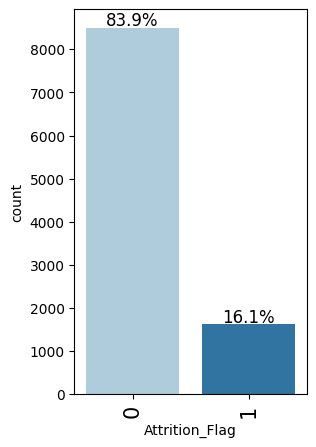

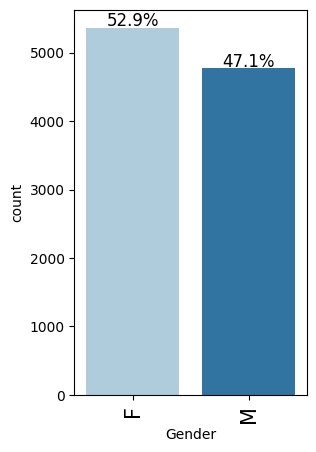

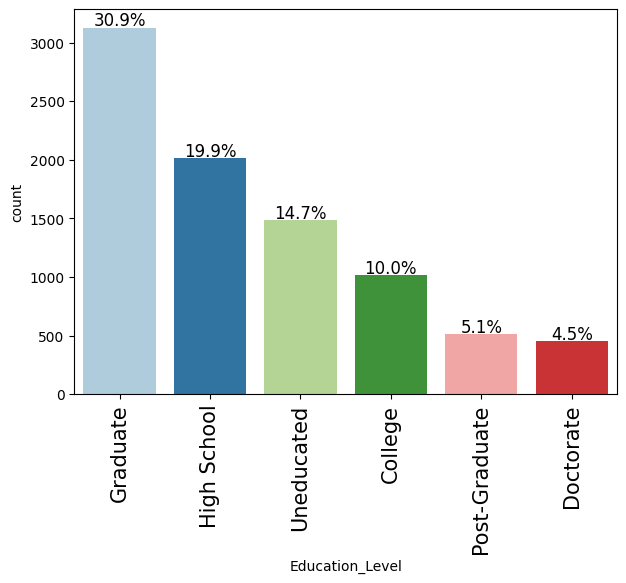

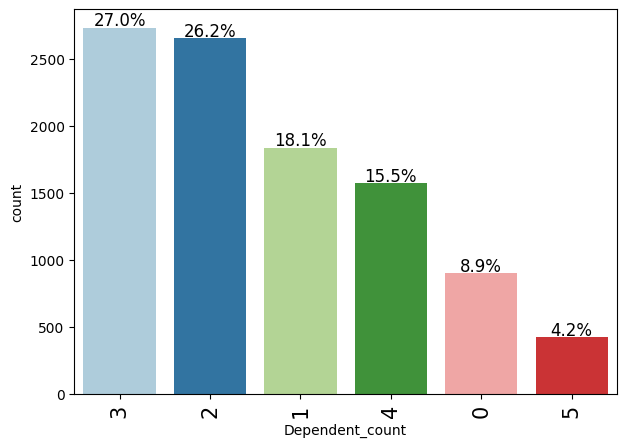

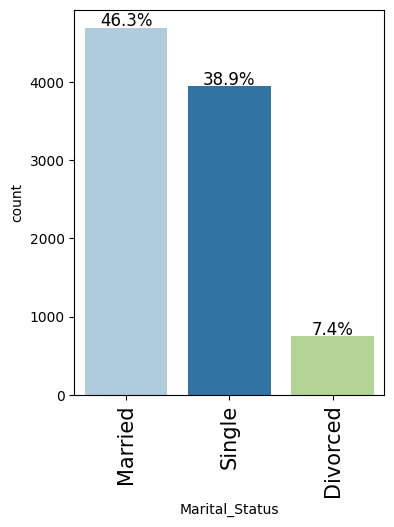

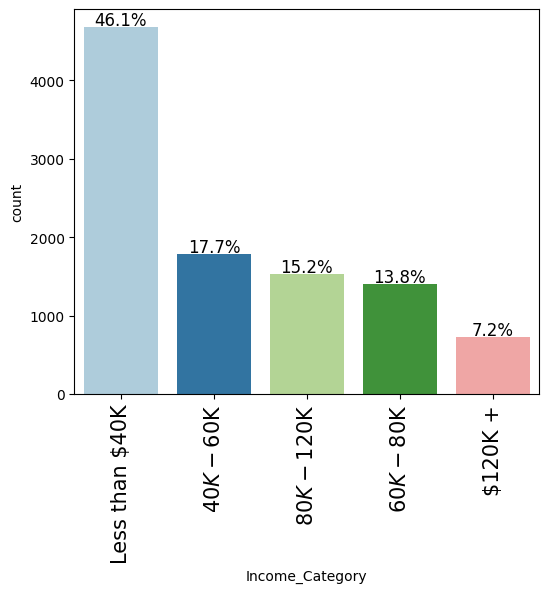

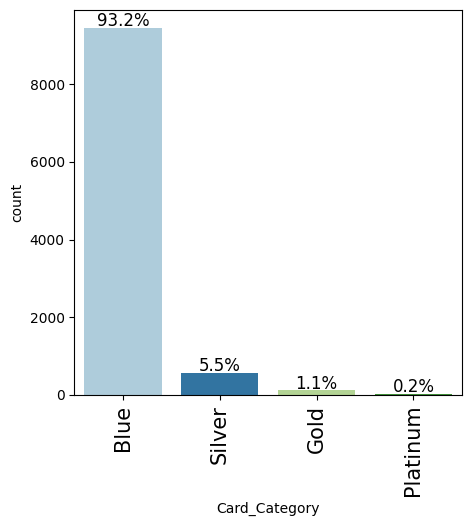

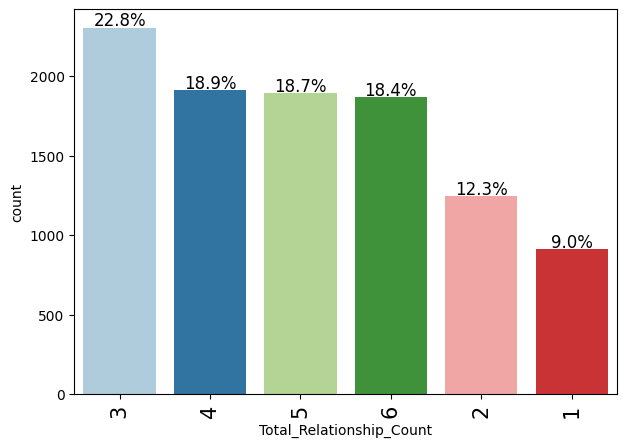

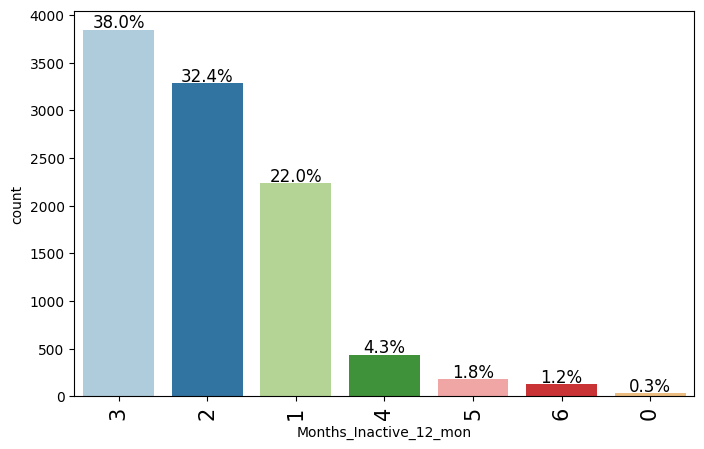

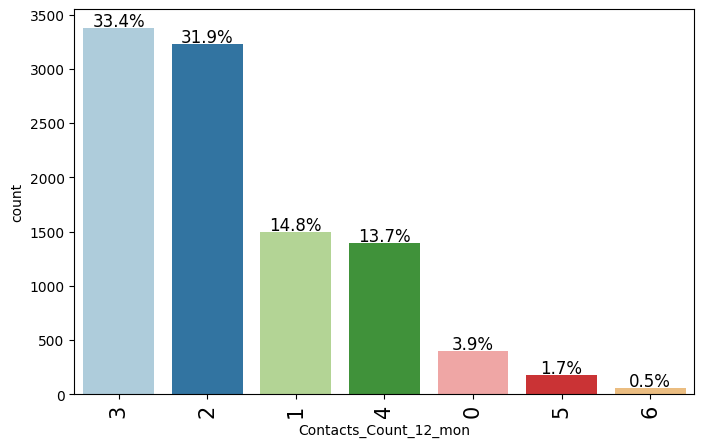

In [ ]:
for col in bar_cols:
  labeled_barplot(data, col, perc=True)

* Churn rate is 16%
* There are slightly more females than males in the dataset
* 31% of clients are Graduates, 20% have a high school education, and almost 15% are uneducated
* 27% of clients have 3 dependents, 26% have 2, 18% have 1 dependent
* 46% of clients are married, 39% are single
* 46% of clients earn less than \$40K annually, only 7% earn more than $120K
* Majority of clients (93%) have cards of category Blue
* Majority of clients have more than 2 products with the bank
* Majority of clients had some transactions within the last 4 months and had 2 or 3 contacts with the bank


###Bivariate analysis

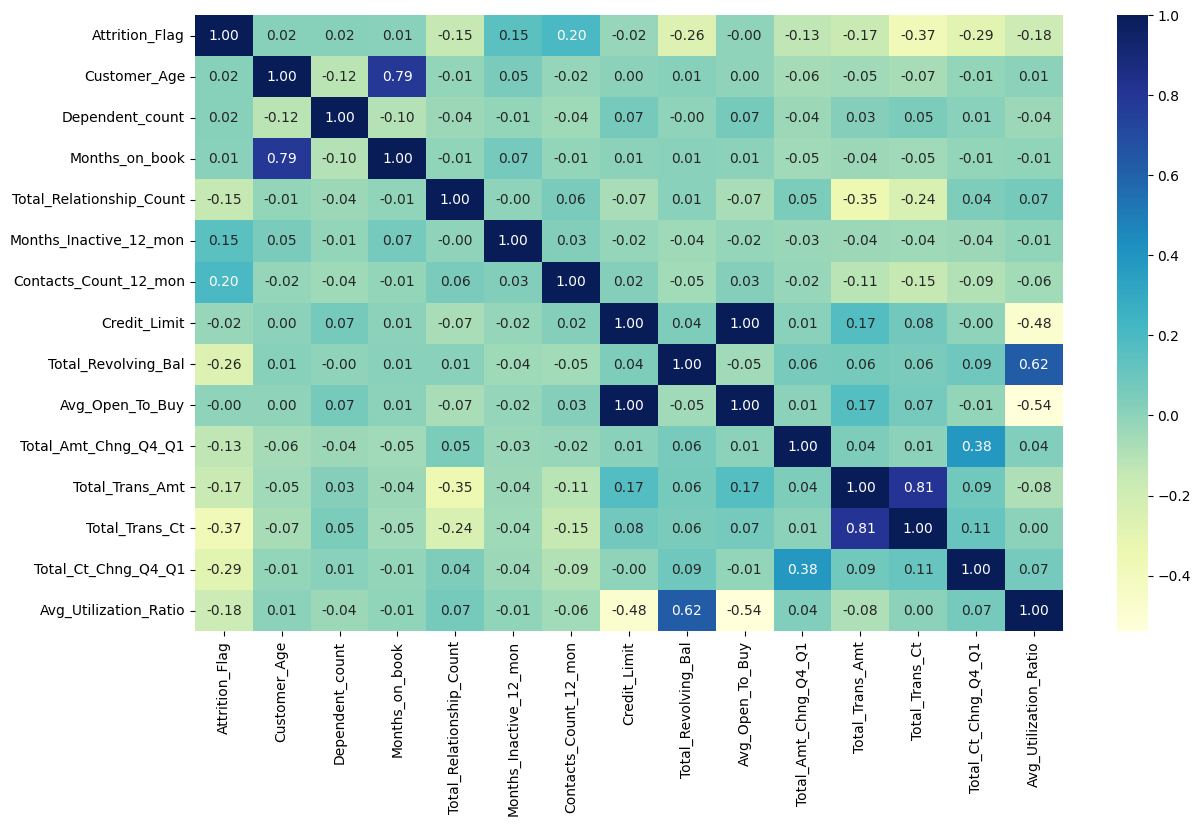

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(numeric_only=True),fmt=".2f",annot=True,cmap="YlGnBu")
plt.show()

* Open to Buy Credit Line (Average of last 12 months) is perfectly correlated with Credit limit,  we can drop one of these fields before modelling
* There are some other fields with strong correlations: 'Months on book' and Customer Age,Total Transaction Amount and Total Transaction Count, Total Revolving Balance and Average Utilization Ratio.
* Change in transaction amount is somewhat correlated with Change in transaction count.
* Average Utilization rate shows negative correlation with Open to Buy Credit Line and Credit Limit.
* Attrition flag is somewhat negatively correlated with Total Transaction Count.

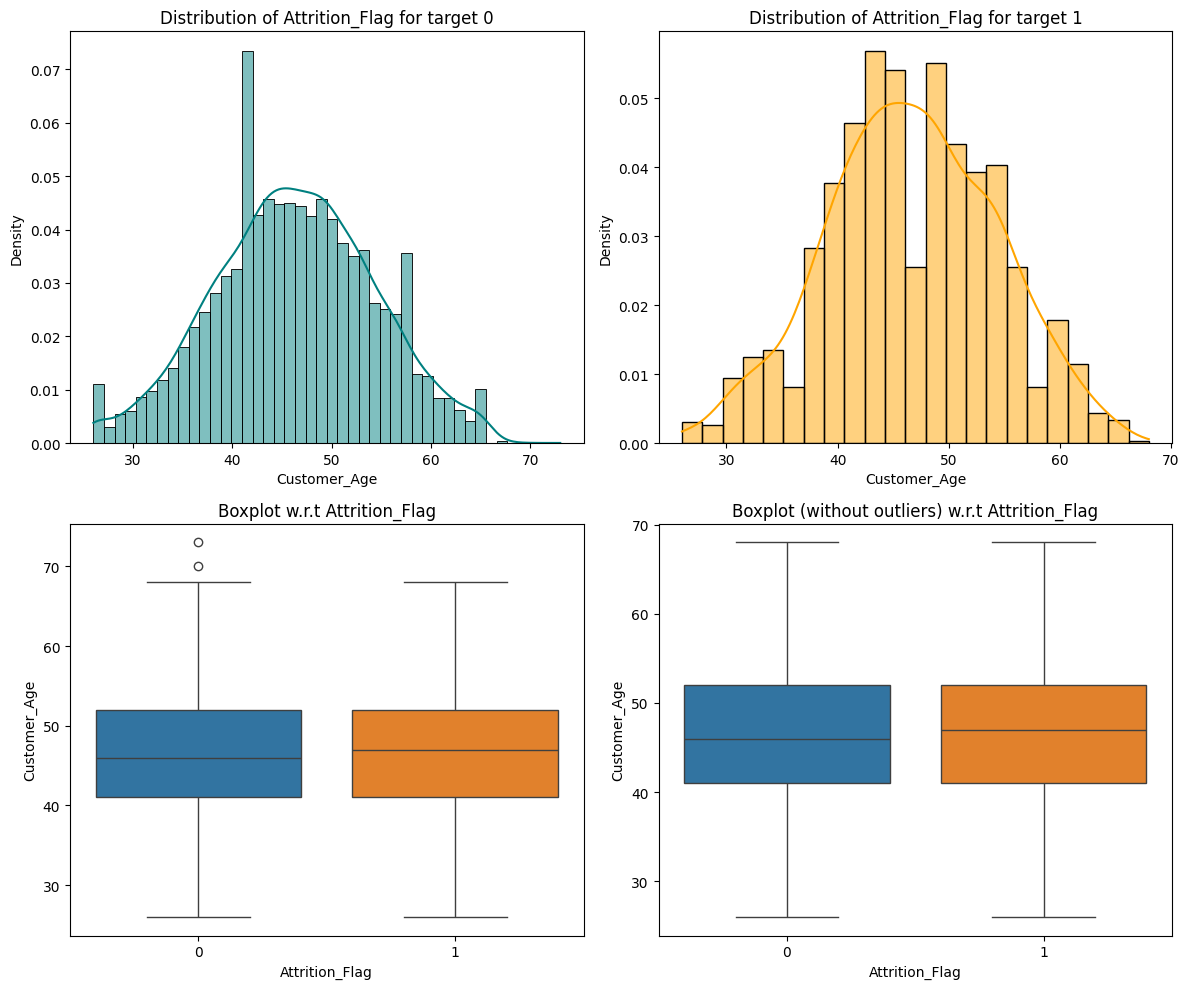

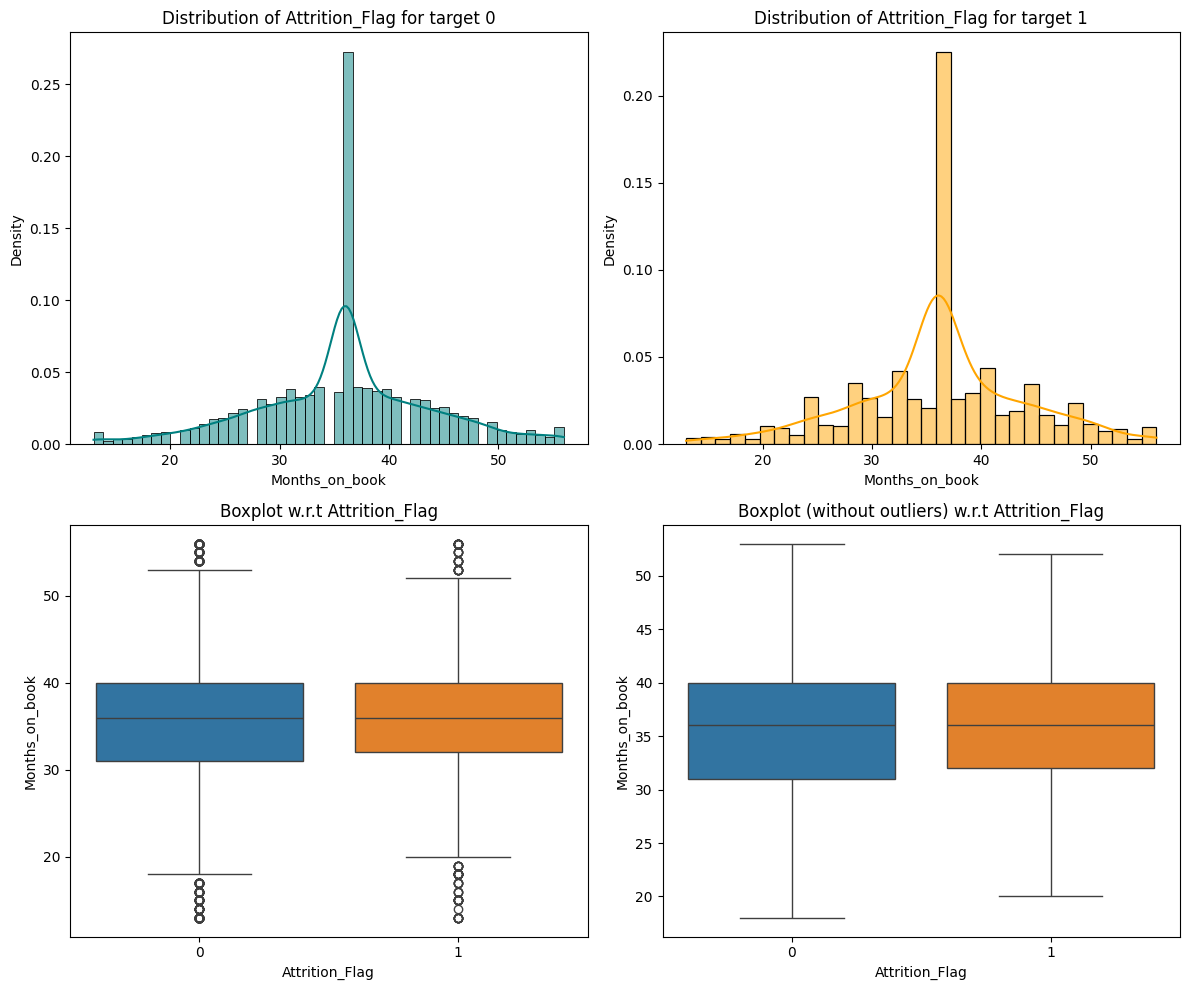

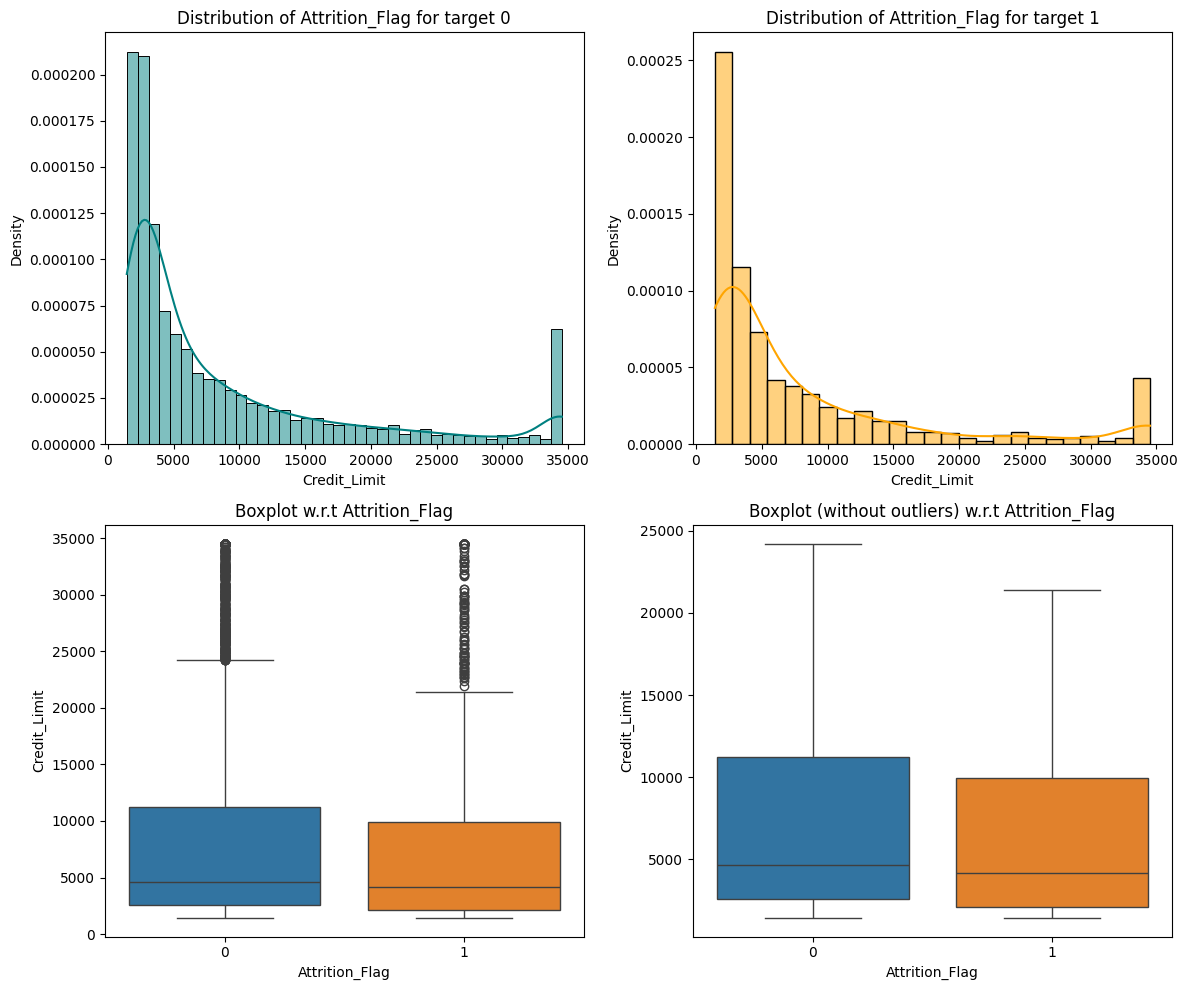

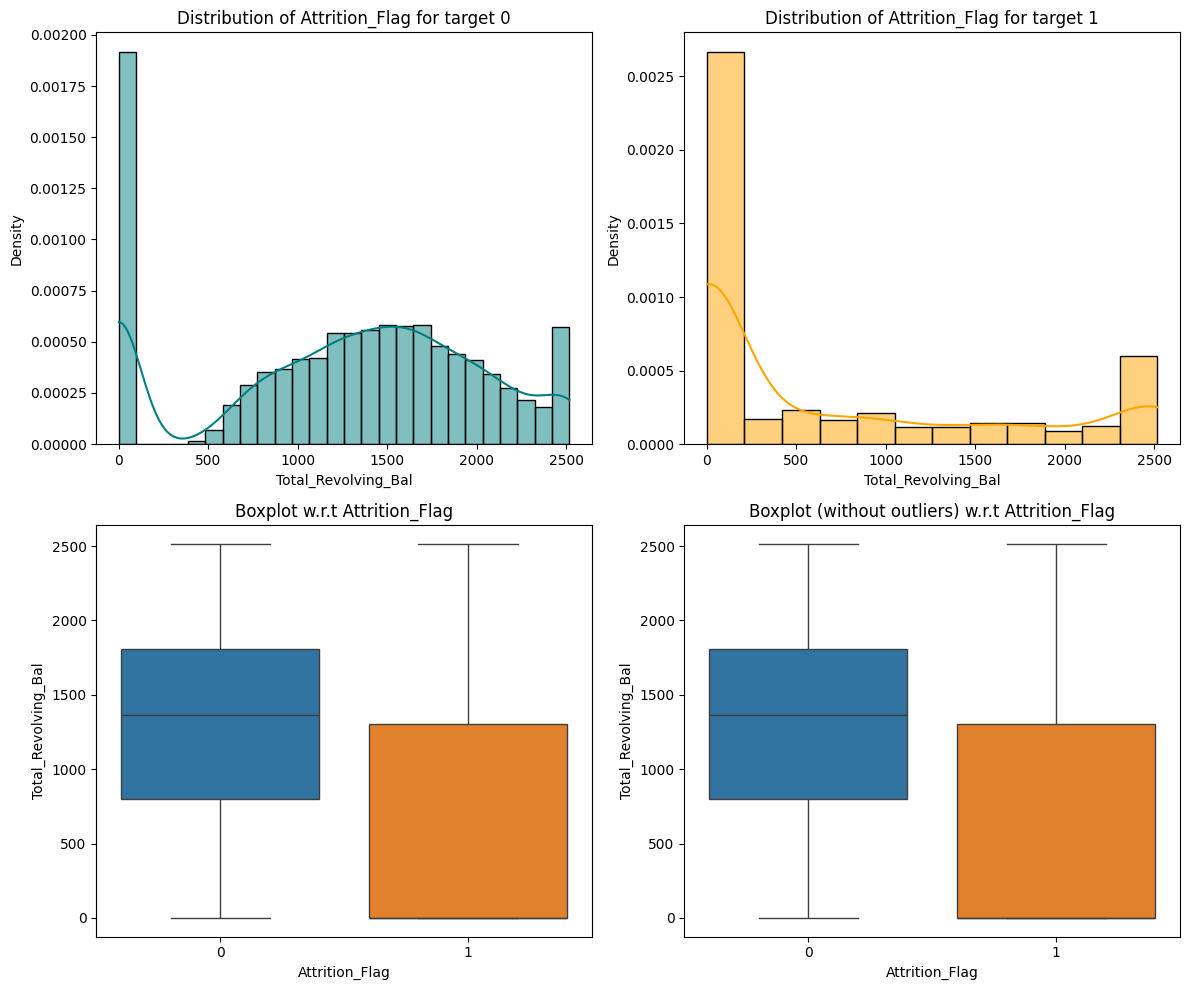

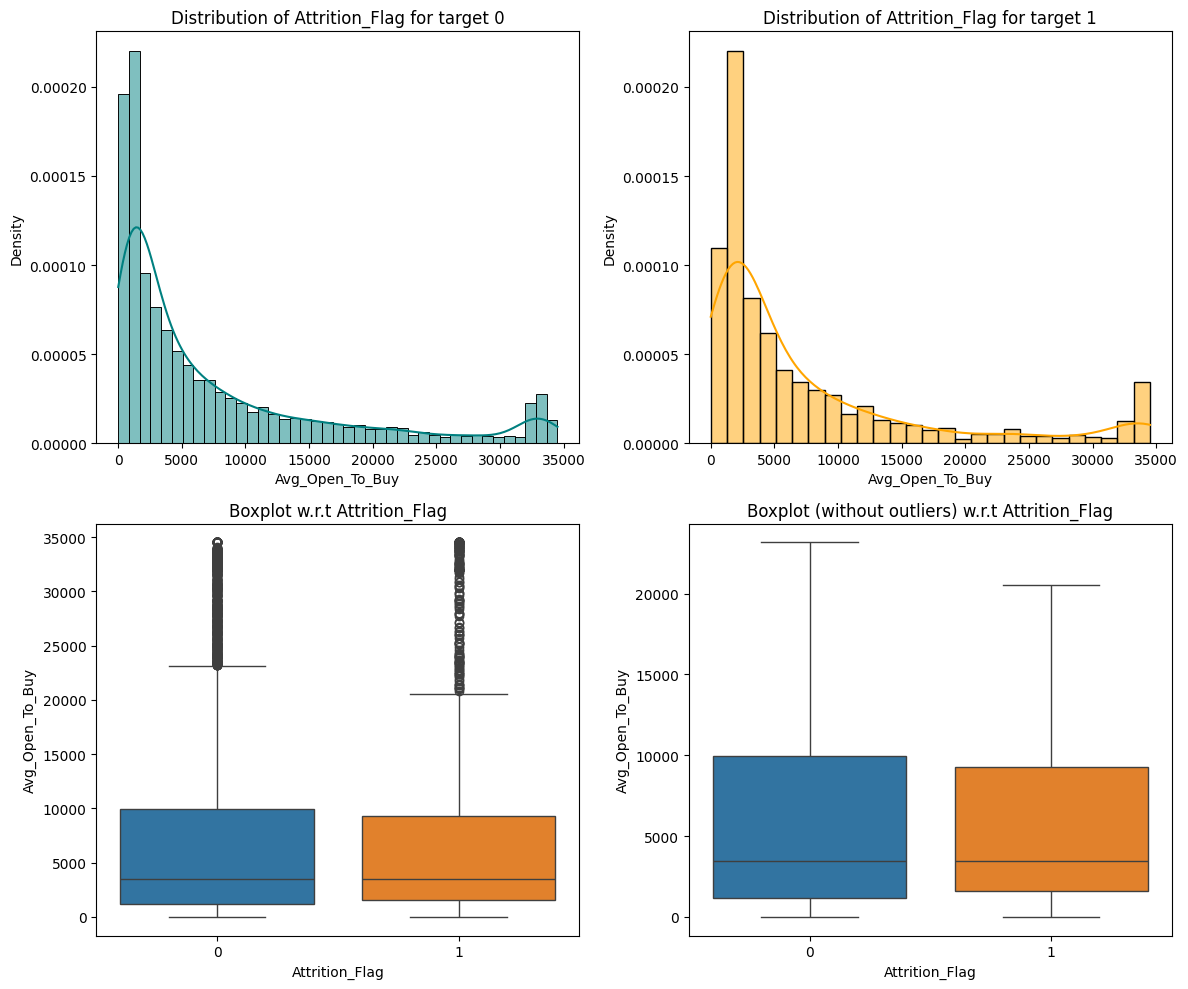

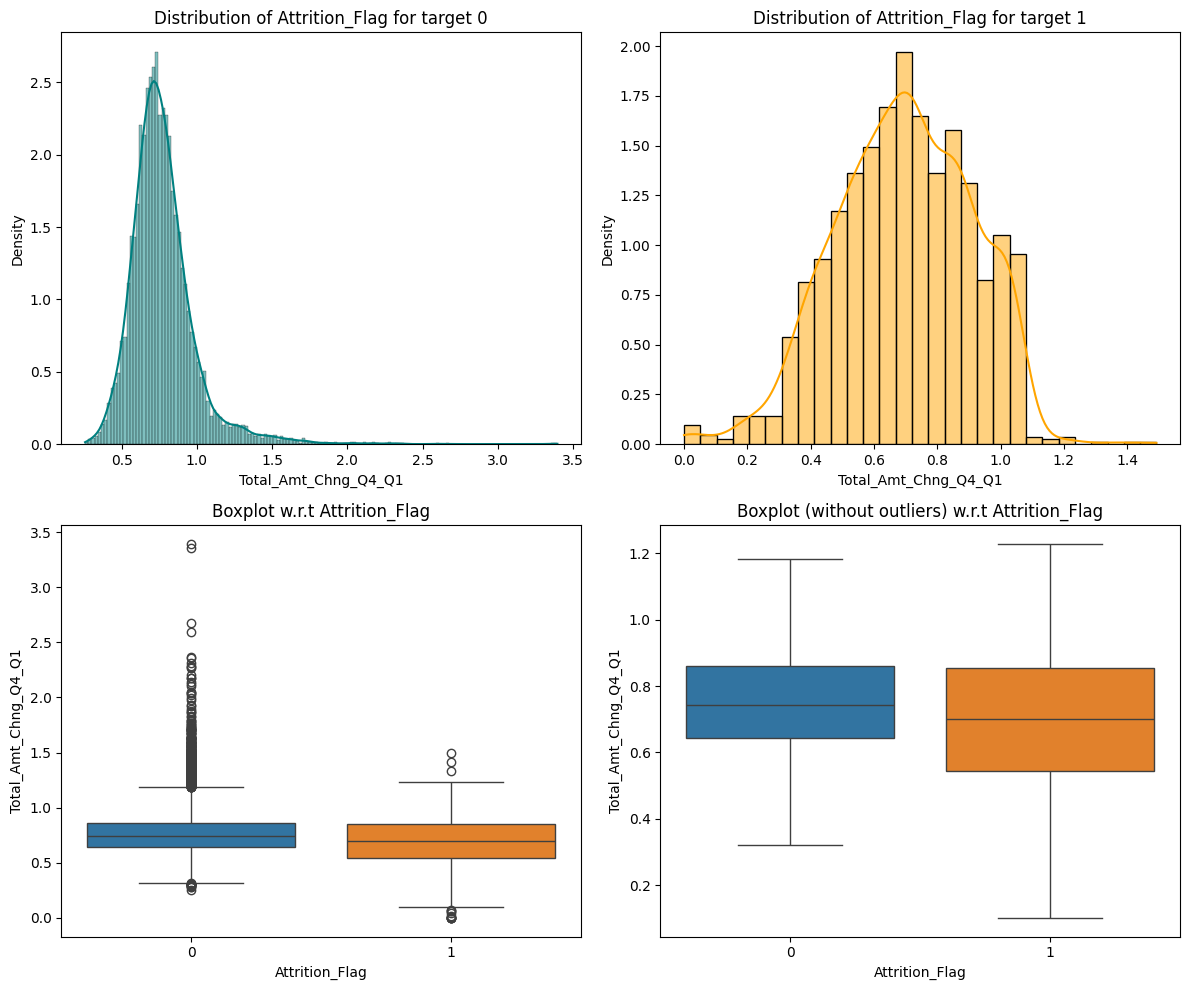

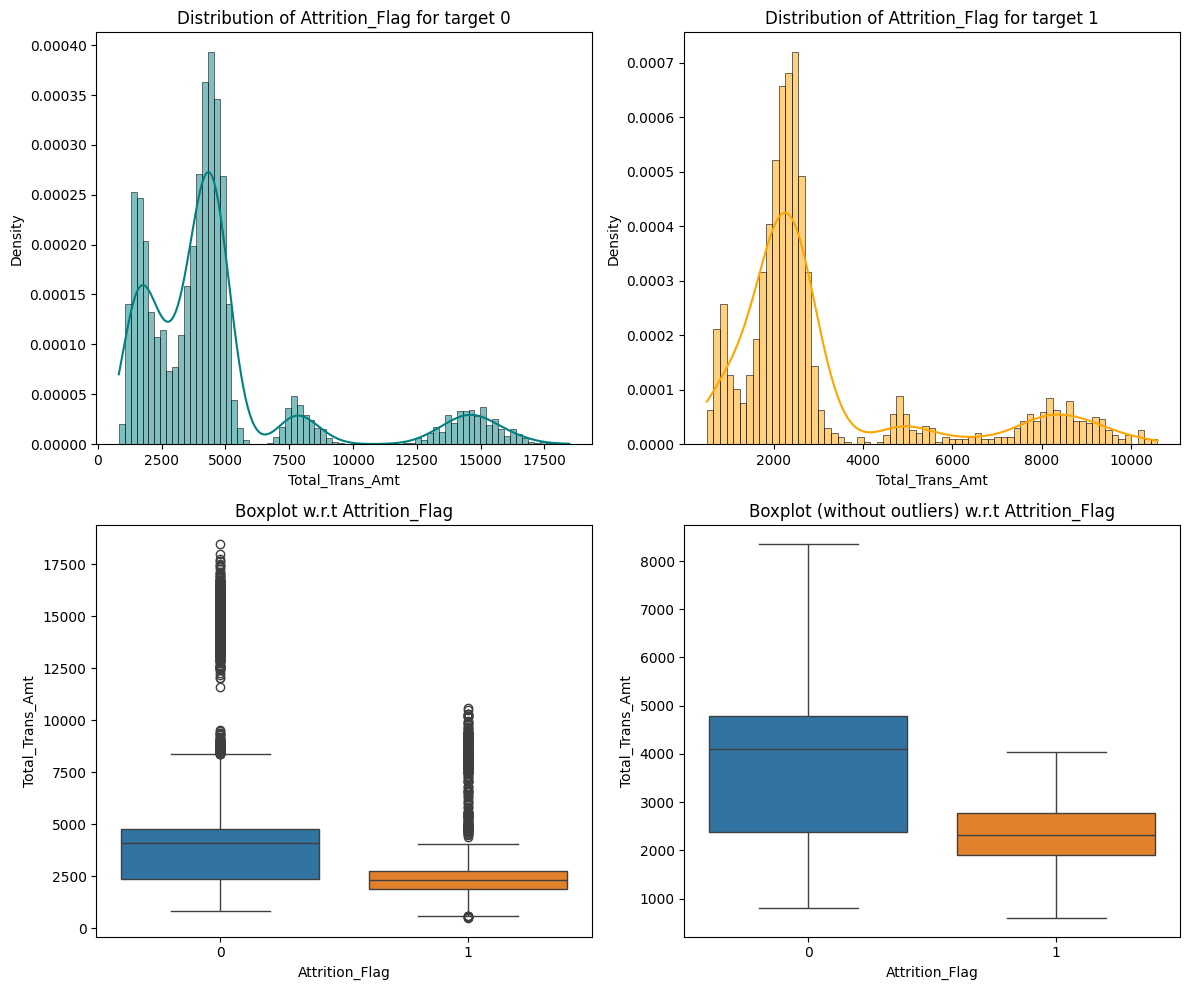

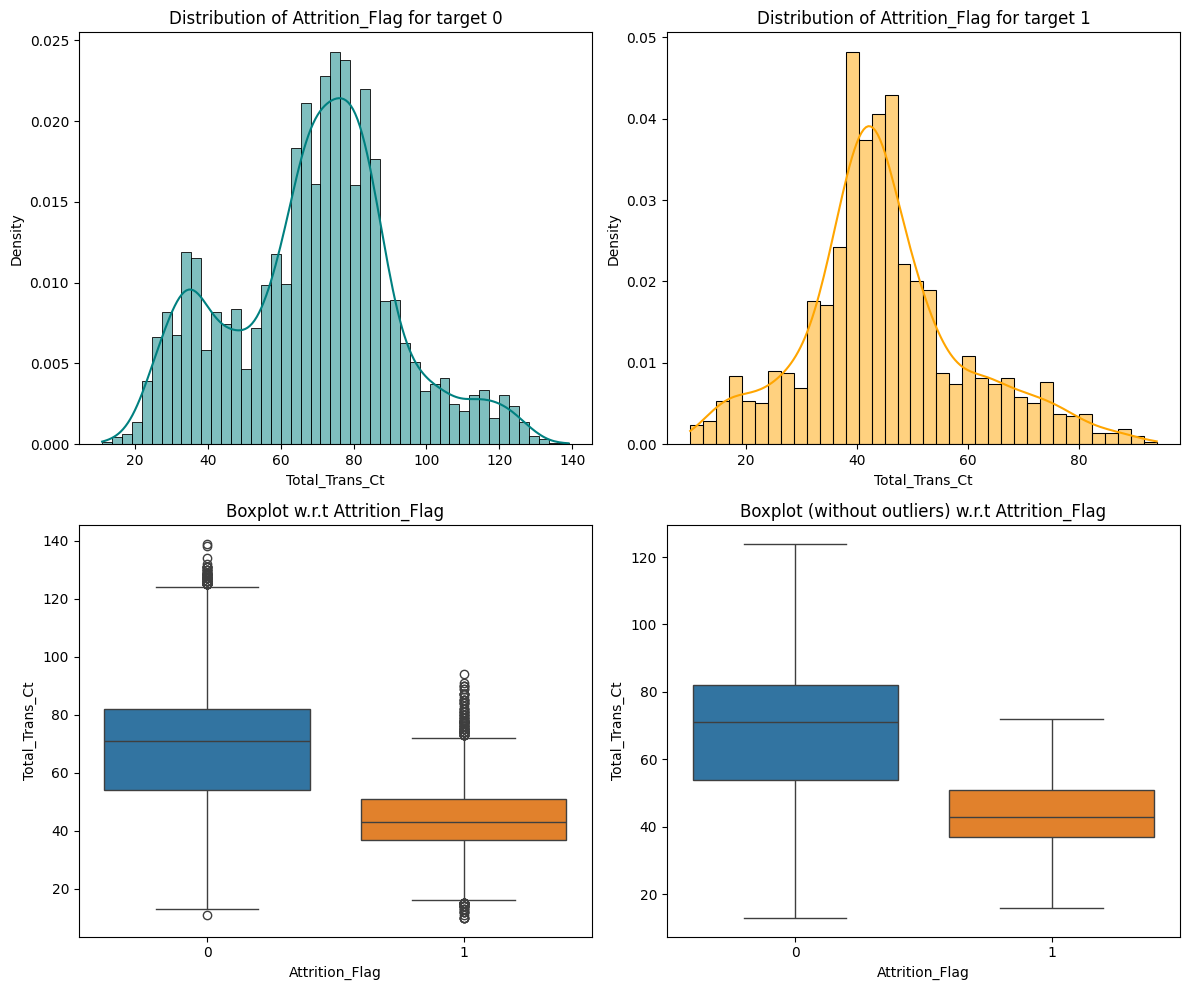

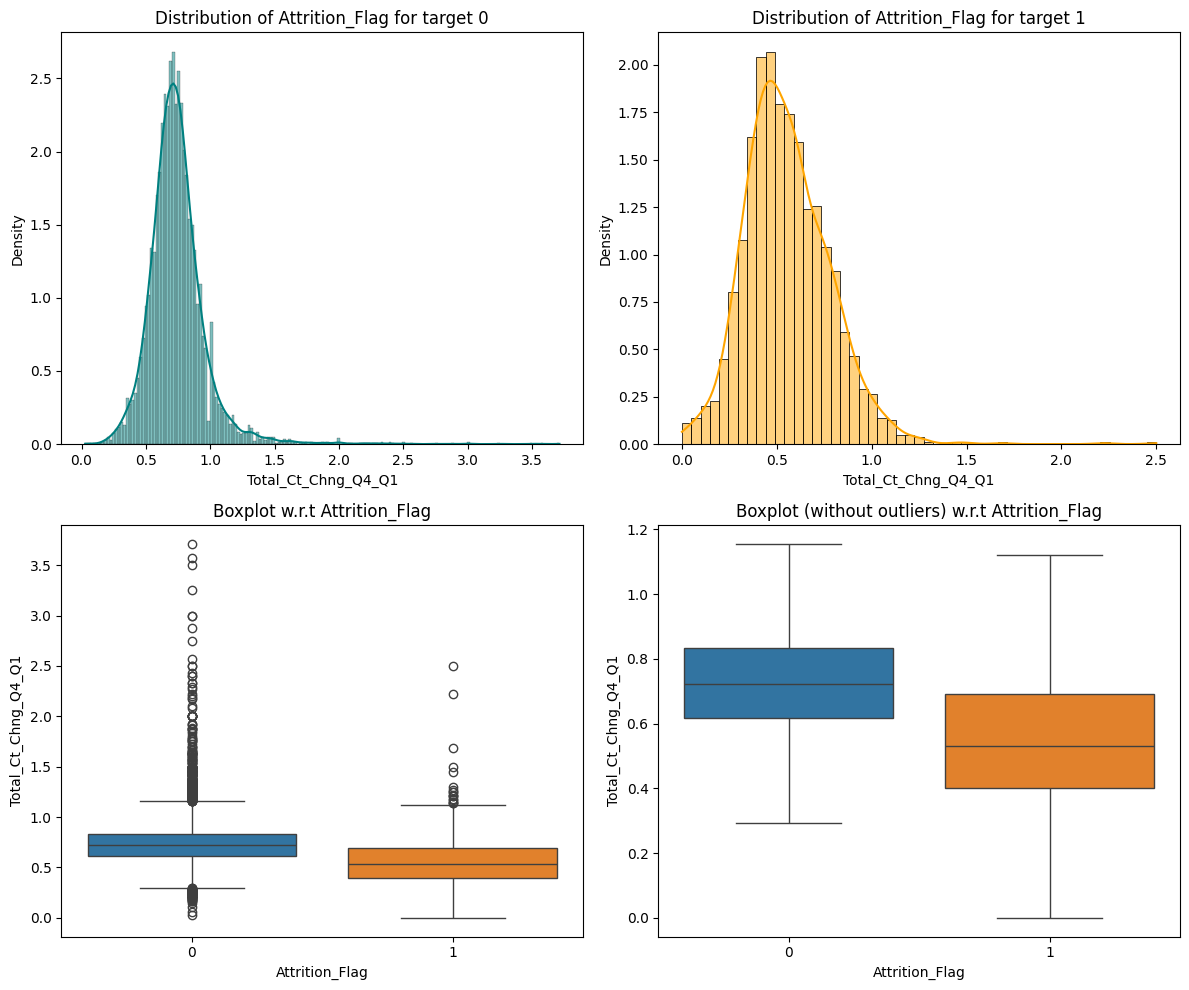

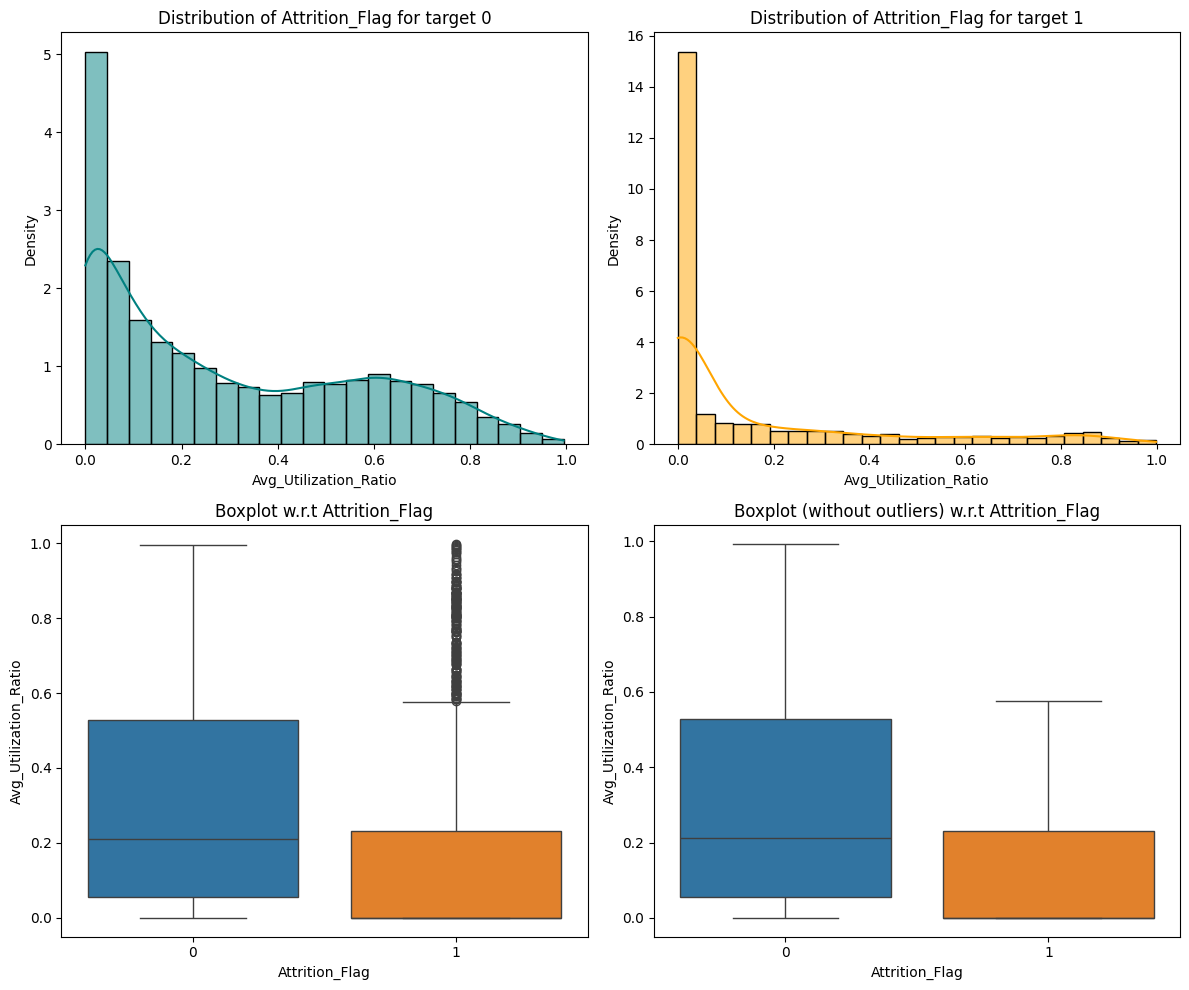

In [ ]:
for col in hist_cols:
  distribution_plot_wrt_target(data, col, 'Attrition_Flag')

* Clients who are churning tend to have slightly lower Credit limit, but the difference is very small
* Clients who are churning tend to have lower total revolving balance
* Change in Transaction Amount (Q4 over Q1) is somewhat lower for the churning clients
* Churning clients have lower Total transaction amount,Total transaction count and Average Utilization Ratio
* Change in transaction count (Q4 over Q1) is also somewhat lower for the churning clients
* It doesn't look like the following columns have any patterns in relation to churn: Customer age, Months on book,Open to buy credit line

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


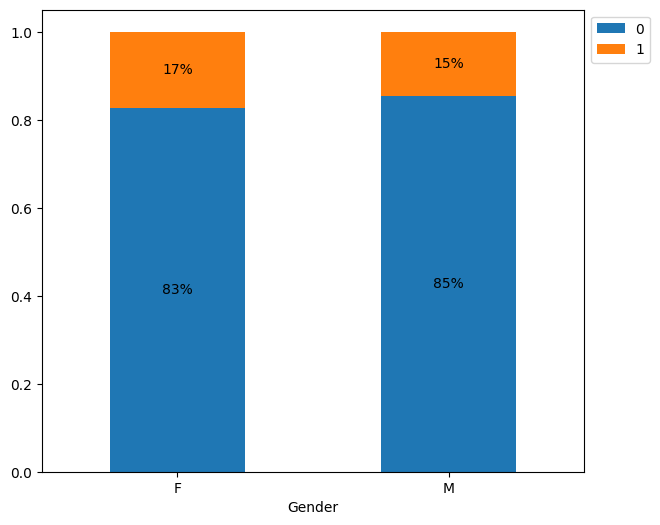

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


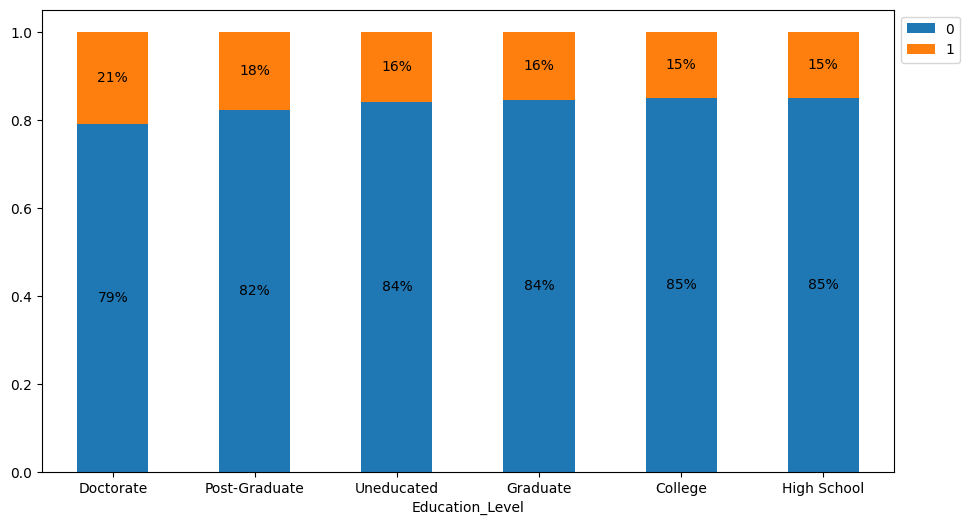

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


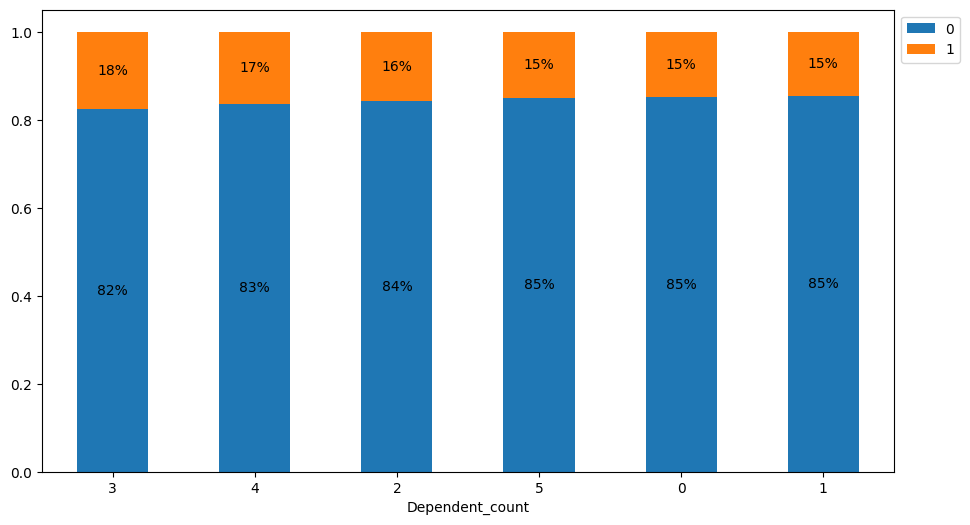

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


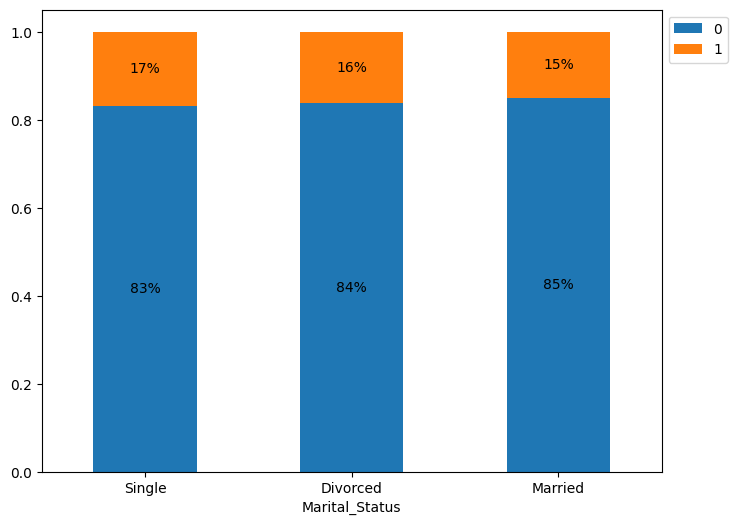

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   3874   799   4673
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


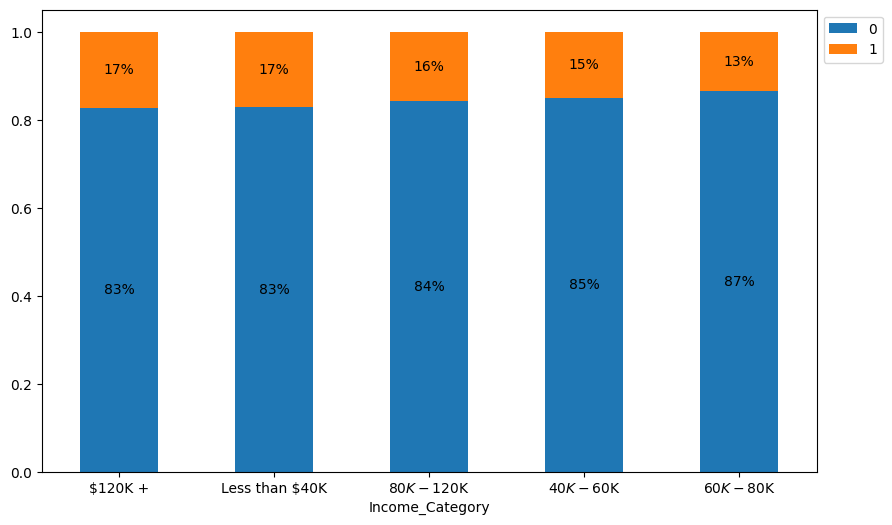

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


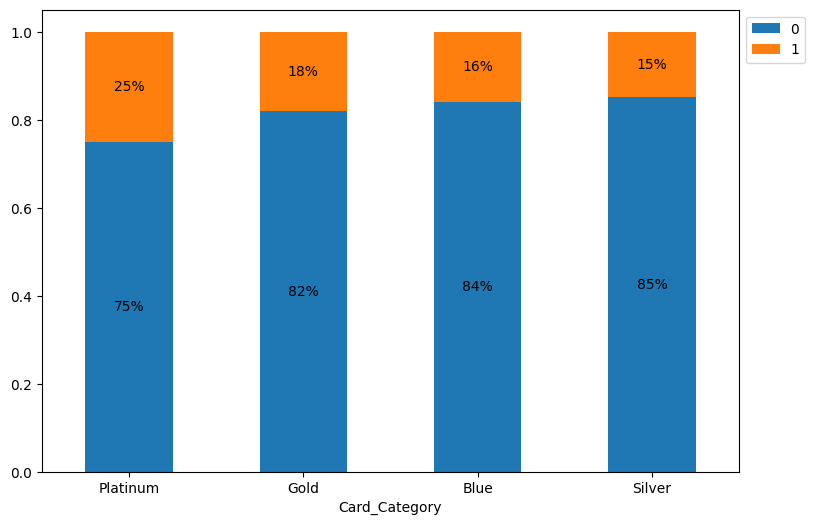

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


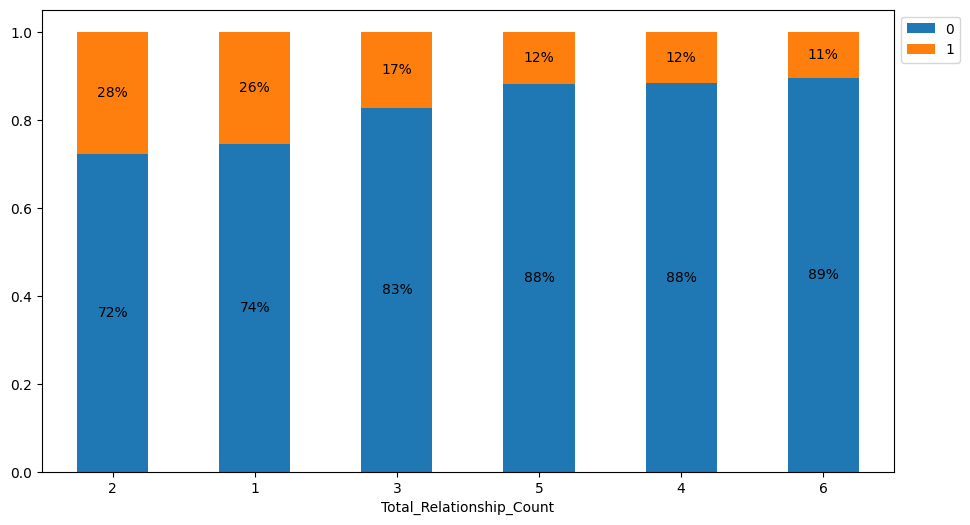

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


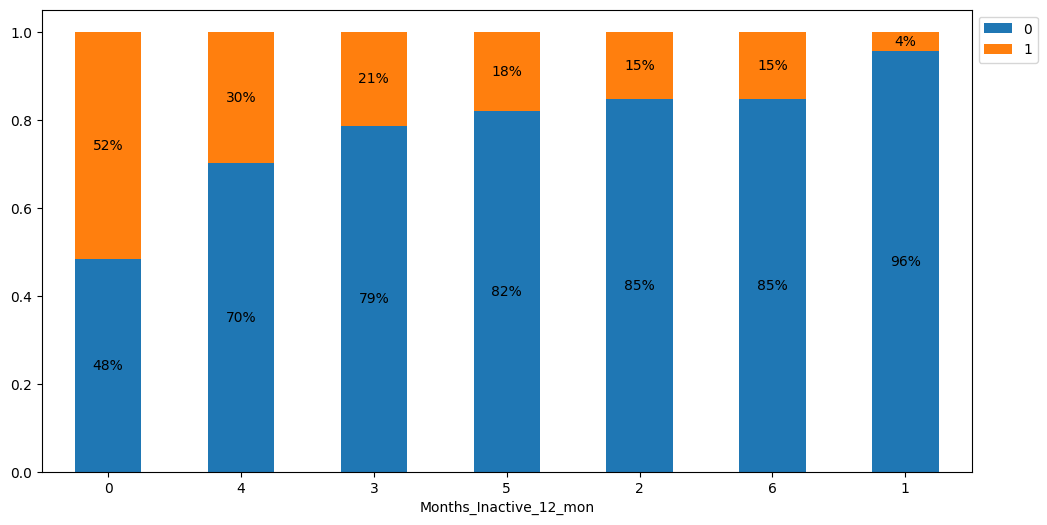

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


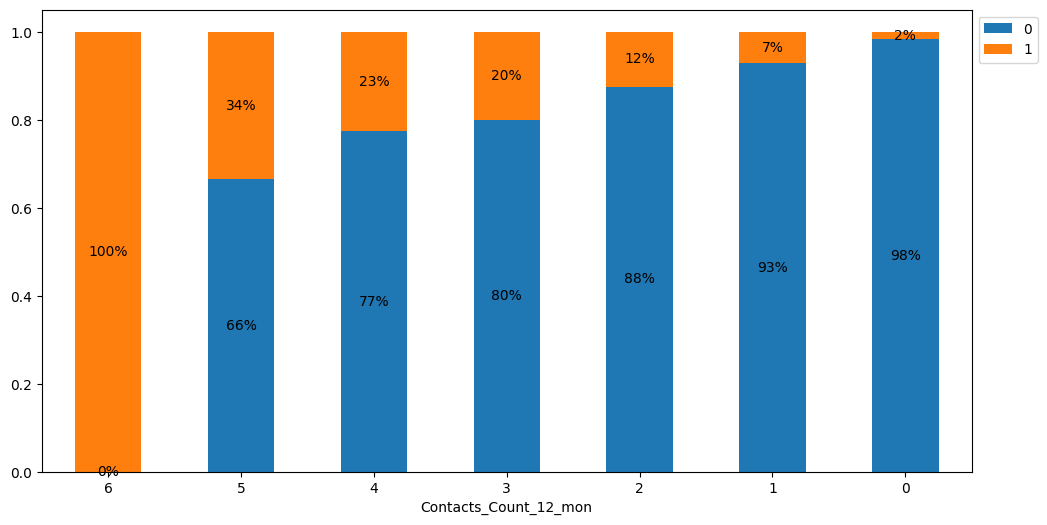

In [ ]:
for col in bar_cols:
  if col!='Attrition_Flag':
    stacked_barplot(data, col, 'Attrition_Flag')

In [ ]:
sns.pairplot(data=data, hue="Attrition_Flag")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

* Females show 2% more churn rate than males (not a significant number)
* If we look are the Education level - percentage-wise clients with Doctorate show the largest churn (21%), but overall the group of clients who have a Doctorate is the smallest. The largest group is Graduates, and it has 16% churn rate
* There is no significant difference in churn rate between clients with different count of dependents
* There is no significant difference in churn rate between clients with different marital status
* Clients who earn less than \$40K  annually and who earn more than \$120K have the same churn rate (17%). Clients with \$60K-$80K annual income have the lowest rate (13%)
* Clients with the Platinum type of card show the largest churn rate (25%), but the group of people with this type of card is also the smallest. Other card types do not show significant difference in churn rate
* Clients who have 1 or 2 Products with the bank have the highest churn rate (26% and 28%). Clients who hold 3 and more products have churn rate 11-17%
* Clients with 0 Inactive months in the last 12 months have the 52% churn rate, but the number of such clients is the smallest. Clients who have being inactive for only a month have the lowest churn rate of 4%. The other 2 biggest groups in terms of inactive months (2 and 3 months) have churn rates of 15% and 21% respectively
* The more times clients contacted the bank in the last year - the larger the churn rate in that group. All clients who contacted the bank 6 times within the last year - churned (but number of such customers is the smallest in the dataset). Customers with 2 or 3 contacts (most common number of contacts) have 12% and 20% churn rate

## Data Pre-processing

### Outlier detection

In [ ]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [ ]:
for col in hist_cols:
  outliers=find_outliers_IQR(data[col])
  print("In {} column there are:\n {} outliers ({:.2f}%)\nMin outlier value: {}\nMax outlier value: {}".format(col,len(outliers),len(outliers)/len(data[col])*100,outliers.min(),outliers.max()))
  print('-'*40)

In Customer_Age column there are:
 2 outliers (0.02%)
Min outlier value: 70
Max outlier value: 73
----------------------------------------
In Months_on_book column there are:
 386 outliers (3.81%)
Min outlier value: 13
Max outlier value: 56
----------------------------------------
In Credit_Limit column there are:
 984 outliers (9.72%)
Min outlier value: 23848.0
Max outlier value: 34516.0
----------------------------------------
In Total_Revolving_Bal column there are:
 0 outliers (0.00%)
Min outlier value: nan
Max outlier value: nan
----------------------------------------
In Avg_Open_To_Buy column there are:
 963 outliers (9.51%)
Min outlier value: 22664.0
Max outlier value: 34516.0
----------------------------------------
In Total_Amt_Chng_Q4_Q1 column there are:
 396 outliers (3.91%)
Min outlier value: 0.0
Max outlier value: 3.397
----------------------------------------
In Total_Trans_Amt column there are:
 896 outliers (8.85%)
Min outlier value: 8620
Max outlier value: 18484
----

* None of the outlier values look impossible, these all can be actual values.
* I choose leave the outliers without treatment

###Train test split

In [ ]:
X=data.drop(columns=['Attrition_Flag','Credit_Limit'],axis=1)
y=data['Attrition_Flag']

In [ ]:
# Splitting the data into training, validation and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=.40, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=.30, random_state=1)

print(X_train.shape, X_val.shape, X_test.shape)

(6076, 18) (2835, 18) (1216, 18)


## Missing value imputation




* We have 2 columns with missing values - 'Education_Level' and 'Marital_Status'. Let's see if we can find is data is missing for some particular categories

In [ ]:
data[data['Education_Level'].isnull()].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attrition_Flag,1519.000,NaN,NaN,NaN,0.169,0.374,0.000,0.000,0.000,0.000,1.000
Customer_Age,1519.000,NaN,NaN,NaN,46.429,7.957,26.000,41.000,47.000,52.000,67.000
Gender,1519,2,F,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,1519.000,NaN,NaN,NaN,2.361,1.330,0.000,1.000,2.000,3.000,5.000
Education_Level,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,1405,3,Married,688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,1519,5,Less than $40K,701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,1519,4,Blue,1420,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,1519.000,NaN,NaN,NaN,35.860,7.917,13.000,32.000,36.000,40.000,56.000
Total_Relationship_Count,1519.000,NaN,NaN,NaN,3.798,1.590,1.000,3.000,4.000,5.000,6.000


In [ ]:
data[data['Marital_Status'].isnull()].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attrition_Flag,749.000,NaN,NaN,NaN,0.172,0.378,0.000,0.000,0.000,0.000,1.000
Customer_Age,749.000,NaN,NaN,NaN,45.569,6.864,26.000,42.000,45.000,49.000,65.000
Gender,749,2,F,380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,749.000,NaN,NaN,NaN,2.538,1.266,0.000,2.000,3.000,3.000,5.000
Education_Level,635,6,Graduate,227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,749,5,Less than $40K,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,749,4,Blue,683,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,749.000,NaN,NaN,NaN,35.190,7.212,13.000,32.000,36.000,39.000,56.000
Total_Relationship_Count,749.000,NaN,NaN,NaN,3.761,1.626,1.000,2.000,4.000,5.000,6.000


* The distribution of other columns for the missing values appears to be the same, so we'll use simple imputer to impute the most frequent value

In [ ]:
imputer = SimpleImputer(strategy="most_frequent")
cols_to_imp=['Education_Level','Marital_Status']
# Fit and transform the train data
X_train[cols_to_imp] = imputer.fit_transform(X_train[cols_to_imp])
# Transform the validation data
X_val[cols_to_imp]  =  imputer.transform(X_val[cols_to_imp])
# Transform the test data
X_test[cols_to_imp] = imputer.transform(X_test[cols_to_imp])

* double-checking that we have no more missing values in any of the datasets

In [ ]:
print(X_train.isnull().sum()[X_train.isnull().sum()>0].sum())
print(X_val.isnull().sum()[X_val.isnull().sum()>0].sum())
print(X_test.isnull().sum()[X_test.isnull().sum()>0].sum())

0
0
0


###Encoding categorical variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val,  drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(6076, 28) (2835, 28) (1216, 28)


In [ ]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
9522,43,3,25,1,2,1,0,17328.000,0.820,15367,105,0.641,0.000,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True
8973,38,3,36,2,2,3,2008,32508.000,0.858,8872,86,0.593,0.058,True,False,True,False,False,False,False,True,False,False,True,False,False,False,True
1745,65,0,56,6,3,2,0,7478.000,0.847,2213,62,0.771,0.000,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False
5896,51,1,40,3,3,0,1362,1412.000,0.866,4802,91,0.685,0.491,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
7007,45,4,37,4,3,3,1986,715.000,0.538,4767,76,0.854,0.735,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False


## Model Building

### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a customer will attrite and the customer doesn't attrite
- Predicting a customer will not attrite and the customer attrites

Which case is more important?

Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

How to reduce this loss i.e need to reduce False Negatives?

Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric='logloss')))

In [ ]:
#fitting the models and calculating the scores
results_train=[]
results_val=[]
names=[]
for name, model in models:
    model.fit(X_train, y_train)
    results_val.append(model_performance_classification_sklearn(model,X_val,y_val).T)
    results_train.append(model_performance_classification_sklearn(model,X_train,y_train).T)
    names.append(name)

In [ ]:
#displaying the scores
models_orig_data_train_df=pd.concat(results_train, axis=1)
models_orig_data_train_df.columns=names
models_orig_data_val_df=pd.concat(results_val, axis=1)
models_orig_data_val_df.columns=names
print("Results on train data\n")
print(models_orig_data_train_df)
print("\nResults on validation data\n")
print(models_orig_data_val_df)

Results on train data

           Decision Tree  Bagging  Random forest  AdaBoost  XGBoost
Accuracy           1.000    0.997          1.000     0.968    1.000
Recall             1.000    0.984          1.000     0.874    1.000
Precision          1.000    0.999          1.000     0.921    1.000
F1                 1.000    0.991          1.000     0.897    1.000

Results on validation data

           Decision Tree  Bagging  Random forest  AdaBoost  XGBoost
Accuracy           0.932    0.952          0.951     0.952    0.970
Recall             0.751    0.793          0.758     0.798    0.871
Precision          0.805    0.895          0.919     0.886    0.933
F1                 0.777    0.841          0.831     0.840    0.901


* all models show different degrees of overfit
* from the five models AdaBoost and XGBoost show the best Recall scores on validation data

### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of X_train: {}".format(X_train_over.shape))
print("After OverSampling, the shape of y_train: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 978
Before OverSampling, count of label '0': 5098 

After OverSampling, count of label '1': 5098
After OverSampling, count of label '0': 5098 

After OverSampling, the shape of X_train: (10196, 28)
After OverSampling, the shape of y_train: (10196,) 



In [ ]:
#fitting the models and calculating the scores
results_train_over=[]
results_val_over=[]
names=[]
for name, model in models:
    model.fit(X_train_over, y_train_over)
    results_val_over.append(model_performance_classification_sklearn(model,X_val,y_val).T)
    results_train_over.append(model_performance_classification_sklearn(model,X_train_over,y_train_over).T)
    names.append(name)

In [ ]:
#displaying the scores
models_over_data_train_df=pd.concat(results_train_over, axis=1)
models_over_data_train_df.columns=names
models_over_data_val_df=pd.concat(results_val_over, axis=1)
models_over_data_val_df.columns=names
print("Results on train data\n")
print(models_over_data_train_df)
print("\nResults on validation data\n")
print(models_over_data_val_df)

Results on train data

           Decision Tree  Bagging  Random forest  AdaBoost  XGBoost
Accuracy           1.000    0.999          1.000     0.966    1.000
Recall             1.000    0.999          1.000     0.971    1.000
Precision          1.000    0.999          1.000     0.962    1.000
F1                 1.000    0.999          1.000     0.966    1.000

Results on validation data

           Decision Tree  Bagging  Random forest  AdaBoost  XGBoost
Accuracy           0.920    0.946          0.948     0.939    0.967
Recall             0.791    0.831          0.827     0.853    0.887
Precision          0.728    0.829          0.842     0.782    0.905
F1                 0.758    0.830          0.834     0.816    0.896


* after oversampling the data all 5 models show improved performance in Recall score
* AdaBoost and XGBoost still show the best Recall score

### Model Building with Undersampled data

In [1]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

NameError: name 'RandomUnderSampler' is not defined

In [ ]:
print("Before Under Sampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

In [ ]:
#fitting the models and calculating the scores
results_train_un=[]
results_val_un=[]
names=[]
for name, model in models:
    model.fit(X_train_un, y_train_un)
    results_val_un.append(model_performance_classification_sklearn(model,X_val,y_val).T)
    results_train_un.append(model_performance_classification_sklearn(model,X_train_un,y_train_un).T)
    names.append(name)

In [ ]:
#displaying the scores
models_un_data_train_df=pd.concat(results_train_un, axis=1)
models_un_data_train_df.columns=names
models_un_data_val_df=pd.concat(results_val_un, axis=1)
models_un_data_val_df.columns=names
print("Results on train data\n")
print(models_un_data_train_df)
print("\nResults on validation data\n")
print(models_un_data_val_df)

* Recall score improves for all 5 models on the undersampled data
* On undersampled data Recall score is the highest for Random Forest and XGBoost

### HyperparameterTuning

* Let us compare once again the results on validation data

In [ ]:
print("Results on validation data")
print("Models trained on original data\n")
print(models_orig_data_val_df)
print("\nModels trained on oversampled data\n")
print(models_over_data_val_df)
print("\nModels trained on undersampled data\n")
print(models_un_data_val_df)

Results on validation data
Models trained on original data

           Decision Tree  Bagging  Random forest  AdaBoost  XGBoost
Accuracy           0.932    0.952          0.951     0.952    0.970
Recall             0.751    0.793          0.758     0.798    0.871
Precision          0.805    0.895          0.919     0.886    0.933
F1                 0.777    0.841          0.831     0.840    0.901

Models trained on oversampled data

           Decision Tree  Bagging  Random forest  AdaBoost  XGBoost
Accuracy           0.920    0.946          0.948     0.939    0.967
Recall             0.791    0.831          0.827     0.853    0.887
Precision          0.728    0.829          0.842     0.782    0.905
F1                 0.758    0.830          0.834     0.816    0.896

Models trained on undersampled data

           Decision Tree  Bagging  Random forest  AdaBoost  XGBoost
Accuracy           0.891    0.926          0.926     0.927    0.946
Recall             0.884    0.924          0.936 

* All models show the highest Recall score when trained on undersampled data, but other metrics get lower on the undersampled data.
* I will try to tune RandomForest, AdaBoost and XGBoost on undersampled data (these 3 models show the highest Recall score of all 15 models)
* I also want to tune XGBoost and AdaBoost models on oversampled data, to see how much further Recall score can be improved

#### Tuning XGBoost using oversampled data

In [ ]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric='logloss')

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 75, 'learning_rate': 0.05, 'gamma': 3} with CV score=0.9909798148896456:


In [ ]:
tuned_xgb_over=XGBClassifier(subsample=0.9, scale_pos_weight=5, n_estimators=75, learning_rate=0.05, gamma=3, random_state=1, eval_metric='logloss')
tuned_xgb_over.fit(X_train_over, y_train_over)

tuned_xgb_over_results_train=model_performance_classification_sklearn(tuned_xgb_over, X_train_over, y_train_over)
print("Results on oversampled training data:\n{}".format(tuned_xgb_over_results_train))
tuned_xgb_over_results_val=model_performance_classification_sklearn(tuned_xgb_over, X_val, y_val)
print("Results on validation data:\n{}".format(tuned_xgb_over_results_val))

Results on oversampled training data:
   Accuracy  Recall  Precision    F1
0     0.971   0.999      0.946 0.972
Results on validation data:
   Accuracy  Recall  Precision    F1
0     0.928   0.951      0.700 0.807


####Tuning AdaBoost on oversampled data

In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9562727780022706:


In [ ]:
tuned_ada_over=AdaBoostClassifier(n_estimators=100, learning_rate=0.1,base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),random_state=1)
tuned_ada_over.fit(X_train_over, y_train_over)

tuned_ada_over_results_train=model_performance_classification_sklearn(tuned_ada_over, X_train_over, y_train_over)
print("Results on oversampled training data:\n{}".format(tuned_ada_over_results_train))
tuned_ada_over_results_val=model_performance_classification_sklearn(tuned_ada_over, X_val, y_val)
print("Results on validation data:\n{}".format(tuned_ada_over_results_val))


Results on oversampled training data:
   Accuracy  Recall  Precision    F1
0     0.987   0.987      0.987 0.987
Results on validation data:
   Accuracy  Recall  Precision    F1
0     0.964   0.873      0.897 0.885


####Tuning Random Forest on undersampled data

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,200,25),
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 175, 'min_samples_leaf': 2, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9396493982208268:


In [ ]:
tuned_rf_un=RandomForestClassifier(n_estimators=175, min_samples_leaf=2, max_samples=0.6, max_features='sqrt',random_state=1)
tuned_rf_un.fit(X_train_un, y_train_un)

tuned_rf_un_results_train=model_performance_classification_sklearn(tuned_rf_un, X_train_un, y_train_un)
print("Results on undersampled training data:\n{}".format(tuned_rf_un_results_train))
tuned_rf_un_results_val=model_performance_classification_sklearn(tuned_rf_un, X_val, y_val)
print("Results on validation data:\n{}".format(tuned_rf_un_results_val))

Results on undersampled training data:
   Accuracy  Recall  Precision    F1
0     0.991   0.997      0.985 0.991
Results on validation data:
   Accuracy  Recall  Precision    F1
0     0.921   0.931      0.686 0.790


####Tuning AdaBoost on undersampled data

In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.9488697017268446:


In [ ]:
tuned_ada_un=AdaBoostClassifier(n_estimators=50, learning_rate=0.1,base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),random_state=1)
tuned_ada_un.fit(X_train_un, y_train_un)

tuned_ada_un_results_train=model_performance_classification_sklearn(tuned_ada_un, X_train_un, y_train_un)
print("Results on undersampled training data:\n{}".format(tuned_ada_un_results_train))
tuned_ada_un_results_val=model_performance_classification_sklearn(tuned_ada_un, X_val, y_val)
print("Results on validation data:\n{}".format(tuned_ada_un_results_val))

Results on undersampled training data:
   Accuracy  Recall  Precision    F1
0     0.952   0.963      0.942 0.952
Results on validation data:
   Accuracy  Recall  Precision    F1
0     0.914   0.944      0.661 0.778


#### Tuning XGBoost on undersampled data

In [ ]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric='logloss')

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 75, 'learning_rate': 0.05, 'gamma': 3} with CV score=0.9815750915750916:


In [ ]:
tuned_xgb_un=XGBClassifier(subsample=0.7, scale_pos_weight=5, n_estimators=75, learning_rate=0.05, gamma=3, random_state=1, eval_metric='logloss')
tuned_xgb_un.fit(X_train_un, y_train_un)

tuned_xgb_un_results_train=model_performance_classification_sklearn(tuned_xgb_un, X_train_un, y_train_un)
print("Results on oversampled training data:\n{}".format(tuned_xgb_un_results_train))
tuned_xgb_un_results_val=model_performance_classification_sklearn(tuned_xgb_un, X_val, y_val)
print("Results on validation data:\n{}".format(tuned_xgb_un_results_val))

Results on oversampled training data:
   Accuracy  Recall  Precision    F1
0     0.966   1.000      0.937 0.967
Results on validation data:
   Accuracy  Recall  Precision    F1
0     0.894   0.982      0.601 0.746


## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        tuned_ada_over_results_train.T,
        tuned_xgb_over_results_train.T,
        tuned_rf_un_results_train.T,
        tuned_ada_un_results_train.T,
        tuned_xgb_un_results_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Tuned AdaBoost trained on Oversampled data",
    "Tuned XGBoost trained on Oversampled data",
    "Tuned Random Forest trained on Undersampled data",
    "Tuned AdaBoost trained on Undersampled data",
    "Tuned XGBoost trained on Undersampled data"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Tuned AdaBoost trained on Oversampled data,Tuned XGBoost trained on Oversampled data,Tuned Random Forest trained on Undersampled data,Tuned AdaBoost trained on Undersampled data,Tuned XGBoost trained on Undersampled data
Accuracy,0.987,0.971,0.991,0.952,0.966
Recall,0.987,0.999,0.997,0.963,1.000
Precision,0.987,0.946,0.985,0.942,0.937
F1,0.987,0.972,0.991,0.952,0.967


In [ ]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        tuned_ada_over_results_val.T,
        tuned_xgb_over_results_val.T,
        tuned_rf_un_results_val.T,
        tuned_ada_un_results_val.T,
        tuned_xgb_un_results_val.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Tuned AdaBoost trained on Oversampled data",
    "Tuned XGBoost trained on Oversampled data",
    "Tuned Random Forest trained on Undersampled data",
    "Tuned AdaBoost trained on Undersampled data",
    "Tuned XGBoost trained on Undersampled data"
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Tuned AdaBoost trained on Oversampled data,Tuned XGBoost trained on Oversampled data,Tuned Random Forest trained on Undersampled data,Tuned AdaBoost trained on Undersampled data,Tuned XGBoost trained on Undersampled data
Accuracy,0.964,0.928,0.921,0.914,0.894
Recall,0.873,0.951,0.931,0.944,0.982
Precision,0.897,0.700,0.686,0.661,0.601
F1,0.885,0.807,0.790,0.778,0.746


* we get the highest Recall score on the validation data (0.982) when using tuned XGBoost trained on undersampled data, let's select that model

### Test set final performance

Testing the selected model (tuned XGBoost trained on undersampled data) on the test dataset

In [ ]:
final_model_test_result=model_performance_classification_sklearn(tuned_xgb_un,X_test,y_test)
final_model_test_result

,Accuracy,Recall,Precision,F1
0,0.892,0.980,0.606,0.749


We are getting a very good recall of 0.98 on the test dataset

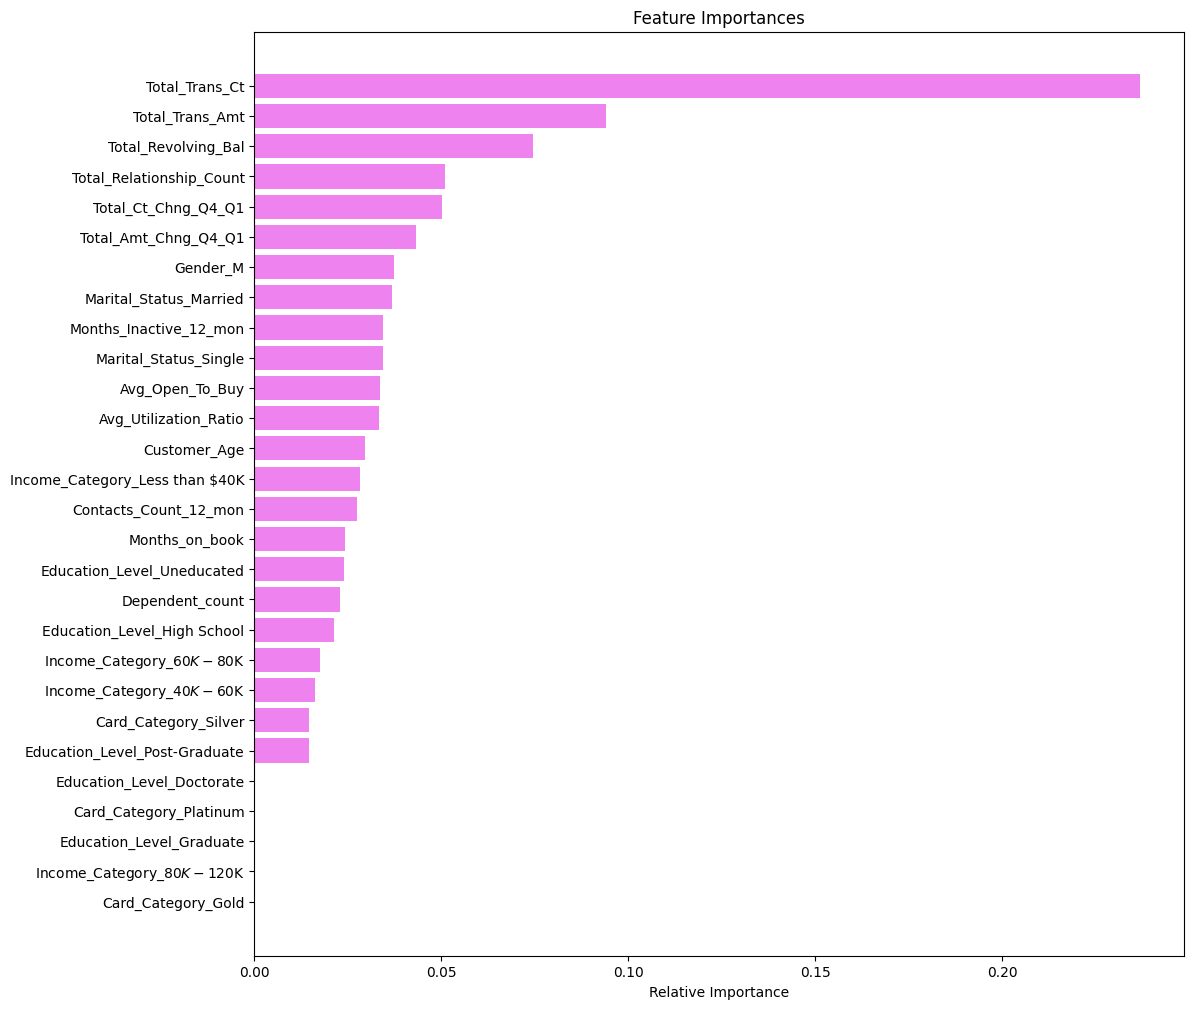

In [ ]:
column_names = list(X_train.columns)
importances = tuned_xgb_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [column_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
data.loc[data['Attrition_Flag']==1,['Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct']].describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Revolving_Bal,1627.000,672.823,921.386,0.000,0.000,0.000,1303.500,2517.000
Total_Trans_Amt,1627.000,3095.026,2308.228,510.000,1903.500,2329.000,2772.000,10583.000
Total_Trans_Ct,1627.000,44.934,14.568,10.000,37.000,43.000,51.000,94.000


In [ ]:
# calculating what percentage of attrited clients had zero revolving balance
len(data.loc[(data['Attrition_Flag']==1) & (data['Total_Revolving_Bal']==0),'Total_Revolving_Bal'])/len(data.loc[data['Attrition_Flag']==1])*100

54.88629379225568

In [ ]:
data.loc[data['Attrition_Flag']==0,['Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct']].describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Revolving_Bal,8500.000,1256.604,757.745,0.000,800.000,1364.000,1807.000,2517.000
Total_Trans_Amt,8500.000,4654.656,3512.773,816.000,2384.750,4100.000,4781.250,18484.000
Total_Trans_Ct,8500.000,68.673,22.919,11.000,54.000,71.000,82.000,139.000


# Business Insights and Conclusions

* Top important features from our final model - Total transaction count, Total transaction amount, Total revolving balance and Total relationship count
* This is also confirmed by our EDA
* The recommendations to the bank would be to keep track of transactions count and transaction amount of the clients, as well as the revolving balance, and initiate some targeted marketing or customer care campains for those clients who show the risk of churning.
* From the EDA we can see that 75% of churned clients had total transaction ammount lower than 2772 and transaction count lower than 51. 55% of churned clients had 0 revolving balance on the credit card.
* It also makes sense to target clients who only hold 1 or 2 products with the bank and try to sell them additional products. Clients with 3 and more products churn less.
* Customer age, Gender, Education level, Income level, Months on book,Open to buy credit line, Number of dependents, Marital status do not appear to have any significant correlation with whether the client churned or not, so we shouldn't use these attributes to target some specific groups.


In [ ]:
%%shell
jupyter nbconvert --to html /content/AML_Project_LearnerNotebook_FullCode_Antonova.ipynb

[NbConvertApp] Converting notebook /content/AML_Project_LearnerNotebook_FullCode_Antonova.ipynb to html
[NbConvertApp] Writing 12551161 bytes to /content/AML_Project_LearnerNotebook_FullCode_Antonova.html
